## Loading libraries

In [149]:
import json.decoder

import numpy as np
import pandas as pd
import sklearn as sk
import json as json
# import seaborn as sns
import matplotlib
import pickle as pk
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer

print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('scikit-learn version:', sk.__version__)
print('json version:', json.__version__)
print('matplotlib version:', matplotlib.__version__)

numpy version: 1.23.3
pandas version: 1.5.0
scikit-learn version: 1.1.2
json version: 2.0.9
matplotlib version: 3.6.0


## Loading data

In [232]:
#DataSets
# df = pd.read_csv('/kaggle/input/food-com-recipes-and-user-interactions/RAW_recipes.csv')
RAW_recipes = pd.read_csv(r"C:\Users\evald\Desktop\Ai minor\dataset\Recipes\archive\RAW_recipes.csv")
RAW_interactions = pd.read_csv(r"C:\Users\evald\Desktop\Ai minor\dataset\Recipes\archive\RAW_interactions.csv")
pkl_recipes = pd.read_pickle(r"C:\Users\evald\Desktop\Ai minor\dataset\Recipes\archive\ingr_map.pkl")

pp_recipes = pd.read_csv(r"C:\Users\evald\Desktop\Ai minor\dataset\Recipes\archive\PP_recipes.csv")
pp_users = pd.read_csv(r"C:\Users\evald\Desktop\Ai minor\dataset\Recipes\archive\PP_users.csv")


# df2=pd.read_csv('/kaggle/input/food-com-recipes-and-user-interactions/RAW_interactions.csv')


In [233]:
RAW_interactions

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."
...,...,...,...,...,...
1132362,116593,72730,2003-12-09,0,Another approach is to start making sauce with...
1132363,583662,386618,2009-09-29,5,These were so delicious! My husband and I tru...
1132364,157126,78003,2008-06-23,5,WOW! Sometimes I don't take the time to rate ...
1132365,53932,78003,2009-01-11,4,Very good! I used regular port as well. The ...


In [151]:

# RAW_recipes.columns = ['name', 'id', 'minutes', 'contributor_id', 'submitted','n_steps', 'steps', 'description', 'ingredients', 'n_ingredients']
RAW_recipes

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8
...,...,...,...,...,...,...,...,...,...,...,...,...
231632,zydeco soup,486161,60,227978,2012-08-29,"['ham', '60-minutes-or-less', 'time-to-make', ...","[415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]",7,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,"['celery', 'onion', 'green sweet pepper', 'gar...",22
231633,zydeco spice mix,493372,5,1500678,2013-01-09,"['15-minutes-or-less', 'time-to-make', 'course...","[14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]",1,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,"['paprika', 'salt', 'garlic powder', 'onion po...",13
231634,zydeco ya ya deviled eggs,308080,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...","[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","['hard-cooked eggs', 'mayonnaise', 'dijon must...",8
231635,cookies by design cookies on a stick,298512,29,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...","[188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]",9,['place melted butter in a large mixing bowl a...,"i've heard of the 'cookies by design' company,...","['butter', 'eagle brand condensed milk', 'ligh...",10


In [152]:
pp_recipes

,id,i,name_tokens,ingredient_tokens,steps_tokens,techniques,calorie_level,ingredient_ids
0,424415,23,"[40480, 37229, 2911, 1019, 249, 6878, 6878, 28...","[[2911, 1019, 249, 6878], [1353], [6953], [153...","[40480, 40482, 21662, 481, 6878, 500, 246, 161...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[389, 7655, 6270, 1527, 3406]"
1,146223,96900,"[40480, 18376, 7056, 246, 1531, 2032, 40481]","[[17918], [25916], [2507, 6444], [8467, 1179],...","[40480, 40482, 729, 2525, 10906, 485, 43, 8393...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[2683, 4969, 800, 5298, 840, 2499, 6632, 7022,..."
2,312329,120056,"[40480, 21044, 16954, 8294, 556, 10837, 40481]","[[5867, 24176], [1353], [6953], [1301, 11332],...","[40480, 40482, 8240, 481, 24176, 296, 1353, 66...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",1,"[1257, 7655, 6270, 590, 5024, 1119, 4883, 6696..."
3,74301,168258,"[40480, 10025, 31156, 40481]","[[1270, 1645, 28447], [21601], [27952, 29471, ...","[40480, 40482, 5539, 21601, 1073, 903, 2324, 4...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[7940, 3609, 7060, 6265, 1170, 6654, 5003, 3561]"
4,76272,109030,"[40480, 17841, 252, 782, 2373, 1641, 2373, 252...","[[1430, 11434], [1430, 17027], [1615, 23, 695,...","[40480, 40482, 14046, 1430, 11434, 488, 17027,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[3484, 6324, 7594, 243]"
...,...,...,...,...,...,...,...,...
178260,323143,76862,"[40480, 6444, 1964, 9369, 486, 569, 17551, 40481]","[[8780], [11835, 1762, 4465, 31494], [6812], [...","[40480, 40482, 729, 2525, 715, 485, 26641, 404...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,"[840, 208, 2499, 2683, 1925, 335, 1511]"
178261,149114,145962,"[40480, 17027, 24715, 974, 11877, 40481]","[[6812], [5940], [30645, 4785, 6821], [6953], ...","[40480, 40482, 729, 2525, 10906, 485, 43, 8393...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[2499, 4717, 1168, 6270, 6324, 7040]"
178262,34200,65066,"[40480, 12187, 11434, 1738, 2627, 40481]","[[6167, 20930, 510], [1353], [15022, 6953], [6...","[40480, 40482, 500, 246, 1719, 5024, 240, 2366...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",2,"[2378, 7655, 3219, 2320, 5168, 5319, 4189, 268..."
178263,30618,77358,"[40480, 870, 488, 1325, 519, 2220, 2417, 488, ...","[[12395, 38308, 40118], [3137, 15022], [30878,...","[40480, 40482, 562, 481, 10734, 240, 23667, 58...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[5627, 2807, 5412, 3399, 7979, 1093, 1257, 780..."


# Cleaning data

## Getting important data from datatables

In [153]:

recipesKG = pp_recipes.merge(right=RAW_recipes, left_on="id", right_on="id")

# recipesKG = recipesKG[["id", "name", "submitted", "ingredient_ids", "ingredients", "n_ingredients"]]
recipesKG = recipesKG[["id", "ingredient_ids"]]
recipesKG = recipesKG.rename({"id":"recipe_id"}, axis="columns")
recipesKG.head()

,recipe_id,ingredient_ids
0,424415,"[389, 7655, 6270, 1527, 3406]"
1,146223,"[2683, 4969, 800, 5298, 840, 2499, 6632, 7022,..."
2,312329,"[1257, 7655, 6270, 590, 5024, 1119, 4883, 6696..."
3,74301,"[7940, 3609, 7060, 6265, 1170, 6654, 5003, 3561]"
4,76272,"[3484, 6324, 7594, 243]"


In [154]:
# Get ingredients id with uniques ingredient name, no duplicates
ingredient_df = pkl_recipes.copy(deep=True)
ingredient_df = ingredient_df.rename({"id":"ingredient_id","replaced":"ingredient_name"}, axis="columns")
ingredient_df = ingredient_df[["ingredient_id", "ingredient_name"]]
ingredient_df = ingredient_df.drop_duplicates(ignore_index=True)
ingredient_df.head(10)



,ingredient_id,ingredient_name
0,4308,lettuce
1,2744,french vanilla pudding and pie filling mix
2,6843,stove top stuffing mix
3,1910,cream cheese
4,1168,cheddar
5,5811,radicchio
6,5205,pasta sauce
7,7233,tomato sauce
8,6482,shredded three cheese
9,4836,mozzarella


## unique ingredient count

In [155]:
uniqueIngredients = pkl_recipes.groupby(by=['replaced'])['id'].count().sort_values(ascending=False)
uniqueIngredientsDF = pd.DataFrame(uniqueIngredients)
uniqueIngredientsDF.rename(columns={'replaced':'ingredient_name','id':'frequency_count'},inplace=True)
# uniqueIngredients.rename(columns={'replaced':'ingredient_name','id':'ingredient_id','id':'frequency_count'},inplace=True)
# uniqueIngredients = uniqueIngredients.rename[["0:"]]
# uniqueIngredients[['ingredient_name','ingredient_id',"ingredient_frequency"]]
uniqueIngredientsDF

,frequency_count
replaced,
dressing,163
sausage,154
chile,99
cake mix,85
cheddar,84
...,...
frozen english pea,1
frozen edamame,1
frozen dough roll,1


In [234]:
uniqueIngredientsDF.head(15)

,frequency_count
replaced,
dressing,163
sausage,154
chile,99
cake mix,85
cheddar,84
tortilla,82
pickle,79
lettuce,42
cream cheese,41


In [156]:
uniqueIngredientsDF.index

Index(['dressing', 'sausage', 'chile', 'cake mix', 'cheddar', 'tortilla',
       'pickle', 'lettuce', 'cream cheese', 'rum',
       ...
       'frozen fruit', 'frozen french-cut green bean', 'frozen french toast',
       'frozen french fry', 'frozen fish stick', 'frozen english pea',
       'frozen edamame', 'frozen dough roll', 'frozen dinner roll',
       'zwieback toast'],
      dtype='object', name='replaced', length=8023)

In [157]:
RAW_interactions=RAW_interactions.drop(['user_id','date','review'],axis=1)
RAW_interactions.head()

,recipe_id,rating
0,40893,4
1,40893,5
2,44394,4
3,85009,5
4,85009,5


# Getting average ratings and votes from users

In [158]:
#Store average rating of meals
AvgInteractions = RAW_interactions['rating'].mean()

#Group seperate meal ratings together and get average meal score equally prevent recipe_id from being an index
newRatingSet=RAW_interactions.groupby(['recipe_id'])['rating'].agg(['mean','count'])
print(newRatingSet.head(10))
newRatingSet.reset_index(inplace=True)


#Rename columns
newRatingSet.rename(columns={'mean':'average_rating','count':'votes'},inplace=True)
newRatingSet.head(10)

               mean  count
recipe_id                 
38         4.250000      4
39         3.000000      1
40         4.333333      9
41         4.500000      2
43         1.000000      1
45         2.666667      3
46         5.000000      2
48         1.000000      2
49         4.350000     20
50         4.500000      2


,recipe_id,average_rating,votes
0,38,4.250000,4
1,39,3.000000,1
2,40,4.333333,9
3,41,4.500000,2
4,43,1.000000,1
5,45,2.666667,3
6,46,5.000000,2
7,48,1.000000,2
8,49,4.350000,20
9,50,4.500000,2


In [159]:
#Merge ratings dataframe with recipe Dataframe
food_df = pd.merge(RAW_recipes, newRatingSet, left_on='id',right_on='recipe_id')

In [160]:
# food_df['ingredient_ids'] = recipesKG['ingredient_ids']

food_df = pd.merge(food_df, recipesKG, on='recipe_id', how='right')
# food_df = food_df[['ingredient_ids','id','name', 'recipe_id', 'minutes', 'contributor_id', 'submitted', 'tags',
#        'nutrition', 'n_steps', 'steps', 'description', 'ingredients',
#        'n_ingredients', 'average_rating', 'votes']]
# food_df = food_df[['ingredient_ids']]
# food_df = food_df.drop_duplicates(ignore_index=True)

In [161]:
food_df

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,recipe_id,average_rating,votes,ingredient_ids
0,aromatic basmati rice rice cooker,424415,61,496803,2010-05-10,"['weeknight', 'time-to-make', 'course', 'main-...","[228.2, 2.0, 2.0, 8.0, 9.0, 1.0, 15.0]",6,"['rinse the rice in a fine strainer , then dra...",from the ultimate rice cooker cookbook. the a...,"['basmati rice', 'water', 'salt', 'cinnamon st...",5,424415,4.833333,6,"[389, 7655, 6270, 1527, 3406]"
1,pumpkin pie a la easy,146223,55,229619,2005-11-25,"['60-minutes-or-less', 'time-to-make', 'course...","[249.4, 16.0, 92.0, 8.0, 11.0, 27.0, 11.0]",10,"['preheat oven to 350', 'combine flour , oats ...",this is a pampered chef recipe for their stone...,"['flour', 'oats', 'brown sugar', 'pecans', 'bu...",12,146223,5.000000,4,"[2683, 4969, 800, 5298, 840, 2499, 6632, 7022,..."
2,cheesy tomato soup with potatoes,312329,25,621626,2008-07-07,"['30-minutes-or-less', 'time-to-make', 'course...","[351.3, 34.0, 15.0, 50.0, 25.0, 70.0, 8.0]",6,"['pour the broth & water into a large pot', 'a...",after modifying another recipe i came up with ...,"['chicken broth', 'water', 'salt', 'black pepp...",15,312329,4.000000,1,"[1257, 7655, 6270, 590, 5024, 1119, 4883, 6696..."
3,mini tacos,74301,15,60989,2003-10-29,"['15-minutes-or-less', 'time-to-make', 'course...","[79.7, 5.0, 2.0, 11.0, 11.0, 7.0, 2.0]",8,"['cook hamburger until browned', 'drain the fa...",these can be a easy appetizer or a light dinne...,"['wonton wrappers', 'hamburger', 'taco seasoni...",8,74301,4.766129,124,"[7940, 3609, 7060, 6265, 1170, 6654, 5003, 3561]"
4,rosemary s hanky panky s,76272,20,93444,2003-11-12,"['30-minutes-or-less', 'time-to-make', 'course...","[240.7, 29.0, 9.0, 28.0, 27.0, 42.0, 0.0]",5,"['fry ground beef and sausage until browned', ...",my girlfriend rosemary gave me this wonderfull...,"['ground beef', 'ground sausage', 'velveeta ch...",4,76272,5.000000,3,"[3484, 6324, 7594, 243]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178260,sugar free snickerdoodles,323143,23,57042,2008-09-04,"['30-minutes-or-less', 'time-to-make', 'course...","[304.1, 30.0, 0.0, 11.0, 10.0, 60.0, 8.0]",6,"['preheat over to 400', 'mix together butter a...",i have not tried this recipe. i got this recip...,"['butter', 'splenda granular', 'eggs', 'flour'...",7,323143,2.000000,4,"[840, 208, 2499, 2683, 1925, 335, 1511]"
178261,sausage pancake strata,149114,70,191220,2005-12-22,"['time-to-make', 'course', 'main-ingredient', ...","[235.9, 26.0, 3.0, 19.0, 35.0, 37.0, 0.0]",14,"['preheat oven to 350', 'coat a 11 x 7 baking ...",my sister gave me this recipe just yesterday. ...,"['eggs', 'milk', 'cheddar cheese', 'salt', 'fr...",7,149114,4.333333,3,"[2499, 4717, 1168, 6270, 6324, 7040]"
178262,baked beef patties,34200,55,37779,2002-07-15,"['60-minutes-or-less', 'time-to-make', 'course...","[577.5, 51.0, 26.0, 38.0, 84.0, 83.0, 8.0]",15,"['in a large bowl , combine 1 / 2 t', 'dried t...",taste of home; family favorite.,"['dried thyme', 'water', 'garlic salt', 'dried...",14,34200,4.500000,2,"[2378, 7655, 3219, 2320, 5168, 5319, 4189, 268..."
178263,good and garlicky sweet and sour pork,30618,40,31499,2002-06-10,"['60-minutes-or-less', 'time-to-make', 'main-i...","[240.1, 5.0, 96.0, 12.0, 41.0, 5.0, 10.0]",13,"['for the sauce , combine all the sauce ingred...",the flavors of this dish mix really well toget...,"['pork tenderloin', 'fresh garlic', 'pineapple...",12,30618,4.612903,31,"[5627, 2807, 5412, 3399, 7979, 1093, 1257, 780..."


In [162]:
findIngredient = ingredient_df.where(ingredient_df['ingredient_id'] == 6270).dropna()
findIngredient

,ingredient_id,ingredient_name
120,6270.0,salt


In [163]:
findIngredient = ingredient_df.where(ingredient_df['ingredient_name'] == "pork").dropna()
findIngredient

,ingredient_id,ingredient_name
6914,5561.0,pork


In [164]:
findItem = food_df.where(food_df['id'] == 86005).dropna()
findItem


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,recipe_id,average_rating,votes,ingredient_ids
153731,zwiebelfleisch onion beef,86005.0,55.0,64642.0,2004-03-07,"['60-minutes-or-less', 'time-to-make', 'course...","[629.0, 58.0, 28.0, 9.0, 99.0, 88.0, 6.0]",7.0,"['cut the meat into thin strips', 'heat butter...","a hearty, rib-sticking german dish posted in r...","['round steaks', 'butter', 'onions', 'marjoram...",11.0,86005.0,4.0,2.0,"[6201, 840, 5010, 4585, 3203, 7620, 7655, 2683..."


start of test for making the ingredient encoding

In [165]:
# compressionToOutputCsv()

In [166]:
#Show the number of votes possesed by the top 10% meals, based on number of votes
q=newRatingSet['votes'].quantile(0.9)
print(q)

9.0


# Recommend a recipe based on what user likes and dislikes

In [167]:
recipesLikesDislikes = food_df

# let's define some polarising ingredients
liked_ingredients = ["cheese", "pizza", "avocado", "chicken"]
hated_ingredients = ["spinach", "mushroom", "olive", "beef", "truffle", "blue cheese"]


# let's add a "like" property
recipesLikesDislikes["like"] = 0

# and populate our data
recipesLikesDislikes.loc[recipesLikesDislikes.ingredients.str.lower().str.contains("|".join(hated_ingredients)), "like"] = -1
recipesLikesDislikes.loc[recipesLikesDislikes.ingredients.str.lower().str.contains("|".join(liked_ingredients)), "like"] = +1

In [168]:
# ingredientLikes = uniqueIngredientsDF
# ingredientLikesd = pd.Series(ingredientLikes)
# ingredientLikesd

In [169]:
# ingredientLikes = uniqueIngredientsDF
#
# # let's define some polarising ingredients
# liked_ingredients = ["cheese", "pizza", "avocado", "chicken"]
# hated_ingredients = ["spinach", "mushroom", "olive", "beef", "truffle", "blue cheese"]
#
#
# # let's add a "like" property
# ingredientLikes["like"] = 0
#
# # and populate our data
# ingredientLikes.loc[ingredientLikes['replaced'].str.lower().str.contains("|".join(hated_ingredients)), "like"] = -1
# ingredientLikes.loc[ingredientLikes['replaced'].str.lower().str.contains("|".join(liked_ingredients)), "like"] = +1

In [170]:
recipesLikesDislikes.head(10)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,recipe_id,average_rating,votes,ingredient_ids,like
0,aromatic basmati rice rice cooker,424415,61,496803,2010-05-10,"['weeknight', 'time-to-make', 'course', 'main-...","[228.2, 2.0, 2.0, 8.0, 9.0, 1.0, 15.0]",6,"['rinse the rice in a fine strainer , then dra...",from the ultimate rice cooker cookbook. the a...,"['basmati rice', 'water', 'salt', 'cinnamon st...",5,424415,4.833333,6,"[389, 7655, 6270, 1527, 3406]",0
1,pumpkin pie a la easy,146223,55,229619,2005-11-25,"['60-minutes-or-less', 'time-to-make', 'course...","[249.4, 16.0, 92.0, 8.0, 11.0, 27.0, 11.0]",10,"['preheat oven to 350', 'combine flour , oats ...",this is a pampered chef recipe for their stone...,"['flour', 'oats', 'brown sugar', 'pecans', 'bu...",12,146223,5.000000,4,"[2683, 4969, 800, 5298, 840, 2499, 6632, 7022,...",0
2,cheesy tomato soup with potatoes,312329,25,621626,2008-07-07,"['30-minutes-or-less', 'time-to-make', 'course...","[351.3, 34.0, 15.0, 50.0, 25.0, 70.0, 8.0]",6,"['pour the broth & water into a large pot', 'a...",after modifying another recipe i came up with ...,"['chicken broth', 'water', 'salt', 'black pepp...",15,312329,4.000000,1,"[1257, 7655, 6270, 590, 5024, 1119, 4883, 6696...",1
3,mini tacos,74301,15,60989,2003-10-29,"['15-minutes-or-less', 'time-to-make', 'course...","[79.7, 5.0, 2.0, 11.0, 11.0, 7.0, 2.0]",8,"['cook hamburger until browned', 'drain the fa...",these can be a easy appetizer or a light dinne...,"['wonton wrappers', 'hamburger', 'taco seasoni...",8,74301,4.766129,124,"[7940, 3609, 7060, 6265, 1170, 6654, 5003, 3561]",1
4,rosemary s hanky panky s,76272,20,93444,2003-11-12,"['30-minutes-or-less', 'time-to-make', 'course...","[240.7, 29.0, 9.0, 28.0, 27.0, 42.0, 0.0]",5,"['fry ground beef and sausage until browned', ...",my girlfriend rosemary gave me this wonderfull...,"['ground beef', 'ground sausage', 'velveeta ch...",4,76272,5.000000,3,"[3484, 6324, 7594, 243]",1
5,pink bavarian crown strawberry dream supreme,465171,250,107135,2011-09-29,"['course', 'gelatin', 'desserts']","[548.9, 20.0, 282.0, 25.0, 16.0, 52.0, 34.0]",15,['mix strawberry jell-o with boiling water the...,"made with dream whip, strawberry jell-o and an...","['strawberry jell-o gelatin dessert', 'water',...",10,465171,4.000000,1,"[6861, 7655, 6846, 6906, 1789, 131, 6863, 1833...",0
6,tom and kelly s chicken fried steak,163861,18,113941,2006-04-11,"['30-minutes-or-less', 'time-to-make', 'course...","[781.6, 82.0, 6.0, 12.0, 94.0, 95.0, 8.0]",11,"['have your butcher ""cube"" 2 lean boneless por...","you'll need your butcher's help with this, but...","['boneless pork chops', 'flour', 'salt', 'pepp...",9,163861,5.000000,3,"[5574, 2683, 6270, 5319, 2499, 869, 1278, 4987...",1
7,chocolate oat cookie bars,186383,40,225997,2006-09-15,"['60-minutes-or-less', 'time-to-make', 'course...","[198.7, 13.0, 62.0, 2.0, 5.0, 11.0, 9.0]",8,"['preheat oven to 350 degrees', 'whisk togethe...",these are made with oil instead of butter/marg...,"['flour', 'oats', 'baking powder', 'baking sod...",10,186383,4.666667,9,"[2683, 4969, 332, 335, 6270, 800, 4987, 7470, ...",0
8,tropical lemon cream bars,116395,50,115658,2005-04-12,"['60-minutes-or-less', 'time-to-make', 'course...","[413.9, 32.0, 138.0, 8.0, 16.0, 53.0, 16.0]",16,"['crust:', 'combine flour , confectioners suga...",a unique blend of ingredients makes this a won...,"['flour', ""confectioners' sugar"", 'powdered mi...",13,116395,4.500000,2,"[2683, 1689, 5687, 1098, 840, 7782, 7011, 1910...",1
9,jeera on cubes barbecue marinade,303460,30,779526,2008-05-13,"['30-minutes-or-less', 'time-to-make', 'course...","[142.3, 16.0, 19.0, 27.0, 4.0, 9.0, 3.0]",7,['roast coriander and cumin and ground afterwa...,if you love jeera (cumin) you will love this o...,"['sesame oil', 'yoghurt', 'fruit vinegar', 'ho...",9,303460,5.000000,1,"[6413, 7997, 3148, 3710, 1799, 2007, 3203, 265...",0


### Alergens

In [171]:
foodIntollerance = [
    "peanuts",
    "nuts",
    "Fish",
    "Shellfish",
    "Milk",
    "Eggs",
    "Soy",
    "Wheat"]

# Quality on DataFrame status

In [172]:
howManyMissing = recipesLikesDislikes.isnull().sum()
howManyMissing

name                 0
id                   0
minutes              0
contributor_id       0
submitted            0
tags                 0
nutrition            0
n_steps              0
steps                0
description       3954
ingredients          0
n_ingredients        0
recipe_id            0
average_rating       0
votes                0
ingredient_ids       0
like                 0
dtype: int64

In [173]:
unknown = recipesLikesDislikes[recipesLikesDislikes['name'] == 'none']
index = unknown.index
fixed_model = recipesLikesDislikes.drop(index)
dropValue = recipesLikesDislikes.isna().any()
dropValue

name              False
id                False
minutes           False
contributor_id    False
submitted         False
tags              False
nutrition         False
n_steps           False
steps             False
description        True
ingredients       False
n_ingredients     False
recipe_id         False
average_rating    False
votes             False
ingredient_ids    False
like              False
dtype: bool

In [174]:
unknown = recipesLikesDislikes[recipesLikesDislikes['description'] == 'none']
index = unknown.index
fixed_model = recipesLikesDislikes.drop(index)
dropValue = recipesLikesDislikes.isna().any()
dropValue

name              False
id                False
minutes           False
contributor_id    False
submitted         False
tags              False
nutrition         False
n_steps           False
steps             False
description        True
ingredients       False
n_ingredients     False
recipe_id         False
average_rating    False
votes             False
ingredient_ids    False
like              False
dtype: bool

In [175]:
recipesLikesDislikes['description'].fillna("not inserted",inplace=True)

## Amount of missing info after clean up

In [176]:
howManyMissing = recipesLikesDislikes.isnull().sum()
howManyMissing

name              0
id                0
minutes           0
contributor_id    0
submitted         0
tags              0
nutrition         0
n_steps           0
steps             0
description       0
ingredients       0
n_ingredients     0
recipe_id         0
average_rating    0
votes             0
ingredient_ids    0
like              0
dtype: int64

In [177]:
# recipesLikesDislikes['name'].fillna("NaN",inplace=True)

In [178]:
# remove spacing in all the rows

# recipesLikesDislikes['name'] = recipesLikesDislikes['name'].apply(lambda x:[i.replace(" ","") for i in x])
# recipesLikesDislikes['name'] = recipesLikesDislikes['name'].apply(lambda x:[i.replace(" ","") for i in x])

In [179]:
recipesLikesDislikes

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,recipe_id,average_rating,votes,ingredient_ids,like
0,aromatic basmati rice rice cooker,424415,61,496803,2010-05-10,"['weeknight', 'time-to-make', 'course', 'main-...","[228.2, 2.0, 2.0, 8.0, 9.0, 1.0, 15.0]",6,"['rinse the rice in a fine strainer , then dra...",from the ultimate rice cooker cookbook. the a...,"['basmati rice', 'water', 'salt', 'cinnamon st...",5,424415,4.833333,6,"[389, 7655, 6270, 1527, 3406]",0
1,pumpkin pie a la easy,146223,55,229619,2005-11-25,"['60-minutes-or-less', 'time-to-make', 'course...","[249.4, 16.0, 92.0, 8.0, 11.0, 27.0, 11.0]",10,"['preheat oven to 350', 'combine flour , oats ...",this is a pampered chef recipe for their stone...,"['flour', 'oats', 'brown sugar', 'pecans', 'bu...",12,146223,5.000000,4,"[2683, 4969, 800, 5298, 840, 2499, 6632, 7022,...",0
2,cheesy tomato soup with potatoes,312329,25,621626,2008-07-07,"['30-minutes-or-less', 'time-to-make', 'course...","[351.3, 34.0, 15.0, 50.0, 25.0, 70.0, 8.0]",6,"['pour the broth & water into a large pot', 'a...",after modifying another recipe i came up with ...,"['chicken broth', 'water', 'salt', 'black pepp...",15,312329,4.000000,1,"[1257, 7655, 6270, 590, 5024, 1119, 4883, 6696...",1
3,mini tacos,74301,15,60989,2003-10-29,"['15-minutes-or-less', 'time-to-make', 'course...","[79.7, 5.0, 2.0, 11.0, 11.0, 7.0, 2.0]",8,"['cook hamburger until browned', 'drain the fa...",these can be a easy appetizer or a light dinne...,"['wonton wrappers', 'hamburger', 'taco seasoni...",8,74301,4.766129,124,"[7940, 3609, 7060, 6265, 1170, 6654, 5003, 3561]",1
4,rosemary s hanky panky s,76272,20,93444,2003-11-12,"['30-minutes-or-less', 'time-to-make', 'course...","[240.7, 29.0, 9.0, 28.0, 27.0, 42.0, 0.0]",5,"['fry ground beef and sausage until browned', ...",my girlfriend rosemary gave me this wonderfull...,"['ground beef', 'ground sausage', 'velveeta ch...",4,76272,5.000000,3,"[3484, 6324, 7594, 243]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178260,sugar free snickerdoodles,323143,23,57042,2008-09-04,"['30-minutes-or-less', 'time-to-make', 'course...","[304.1, 30.0, 0.0, 11.0, 10.0, 60.0, 8.0]",6,"['preheat over to 400', 'mix together butter a...",i have not tried this recipe. i got this recip...,"['butter', 'splenda granular', 'eggs', 'flour'...",7,323143,2.000000,4,"[840, 208, 2499, 2683, 1925, 335, 1511]",0
178261,sausage pancake strata,149114,70,191220,2005-12-22,"['time-to-make', 'course', 'main-ingredient', ...","[235.9, 26.0, 3.0, 19.0, 35.0, 37.0, 0.0]",14,"['preheat oven to 350', 'coat a 11 x 7 baking ...",my sister gave me this recipe just yesterday. ...,"['eggs', 'milk', 'cheddar cheese', 'salt', 'fr...",7,149114,4.333333,3,"[2499, 4717, 1168, 6270, 6324, 7040]",1
178262,baked beef patties,34200,55,37779,2002-07-15,"['60-minutes-or-less', 'time-to-make', 'course...","[577.5, 51.0, 26.0, 38.0, 84.0, 83.0, 8.0]",15,"['in a large bowl , combine 1 / 2 t', 'dried t...",taste of home; family favorite.,"['dried thyme', 'water', 'garlic salt', 'dried...",14,34200,4.500000,2,"[2378, 7655, 3219, 2320, 5168, 5319, 4189, 268...",1
178263,good and garlicky sweet and sour pork,30618,40,31499,2002-06-10,"['60-minutes-or-less', 'time-to-make', 'main-i...","[240.1, 5.0, 96.0, 12.0, 41.0, 5.0, 10.0]",13,"['for the sauce , combine all the sauce ingred...",the flavors of this dish mix really well toget...,"['pork tenderloin', 'fresh garlic', 'pineapple...",12,30618,4.612903,31,"[5627, 2807, 5412, 3399, 7979, 1093, 1257, 780...",1


# Data clean up for any symbols

With the data right now we can see possible dishes that the person would like and dislike.
But we stil have a lot of undefined prefference for this we can use simillarity vectors K
to search for similarities

In [180]:
# recipesLikesDislikes.nunique()
ingredient_df['ingredient_name'] = ingredient_df['ingredient_name'].str.replace('\'s', '')
recipesLikesDislikes['ingredients'] = recipesLikesDislikes['ingredients'].str.replace('(\[|\])', '')
recipesLikesDislikes['ingredients'] = recipesLikesDislikes['ingredients'].str.replace('(\')', '')
recipesLikesDislikes['steps'] = recipesLikesDislikes['steps'].str.replace('(\[|\])', '')
recipesLikesDislikes['steps'] = recipesLikesDislikes['steps'].str.replace('(\')', '')



C:\Users\evald\AppData\Local\Temp\ipykernel_21980\983604293.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  recipesLikesDislikes['ingredients'] = recipesLikesDislikes['ingredients'].str.replace('(\[|\])', '')
C:\Users\evald\AppData\Local\Temp\ipykernel_21980\983604293.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  recipesLikesDislikes['ingredients'] = recipesLikesDislikes['ingredients'].str.replace('(\')', '')
C:\Users\evald\AppData\Local\Temp\ipykernel_21980\983604293.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  recipesLikesDislikes['steps'] = recipesLikesDislikes['steps'].str.replace('(\[|\])', '')
C:\Users\evald\AppData\Local\Temp\ipykernel_21980\983604293.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  recipesLikesDislikes['steps'] = recipesLikesDislikes['steps'].st

In [181]:
recipesLikesDislikes

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,recipe_id,average_rating,votes,ingredient_ids,like
0,aromatic basmati rice rice cooker,424415,61,496803,2010-05-10,"['weeknight', 'time-to-make', 'course', 'main-...","[228.2, 2.0, 2.0, 8.0, 9.0, 1.0, 15.0]",6,"rinse the rice in a fine strainer , then drain...",from the ultimate rice cooker cookbook. the a...,"basmati rice, water, salt, cinnamon stick, gre...",5,424415,4.833333,6,"[389, 7655, 6270, 1527, 3406]",0
1,pumpkin pie a la easy,146223,55,229619,2005-11-25,"['60-minutes-or-less', 'time-to-make', 'course...","[249.4, 16.0, 92.0, 8.0, 11.0, 27.0, 11.0]",10,"preheat oven to 350, combine flour , oats , br...",this is a pampered chef recipe for their stone...,"flour, oats, brown sugar, pecans, butter, eggs...",12,146223,5.000000,4,"[2683, 4969, 800, 5298, 840, 2499, 6632, 7022,...",0
2,cheesy tomato soup with potatoes,312329,25,621626,2008-07-07,"['30-minutes-or-less', 'time-to-make', 'course...","[351.3, 34.0, 15.0, 50.0, 25.0, 70.0, 8.0]",6,"pour the broth & water into a large pot, add t...",after modifying another recipe i came up with ...,"chicken broth, water, salt, black pepper, onio...",15,312329,4.000000,1,"[1257, 7655, 6270, 590, 5024, 1119, 4883, 6696...",1
3,mini tacos,74301,15,60989,2003-10-29,"['15-minutes-or-less', 'time-to-make', 'course...","[79.7, 5.0, 2.0, 11.0, 11.0, 7.0, 2.0]",8,"cook hamburger until browned, drain the fat an...",these can be a easy appetizer or a light dinne...,"wonton wrappers, hamburger, taco seasoning, sa...",8,74301,4.766129,124,"[7940, 3609, 7060, 6265, 1170, 6654, 5003, 3561]",1
4,rosemary s hanky panky s,76272,20,93444,2003-11-12,"['30-minutes-or-less', 'time-to-make', 'course...","[240.7, 29.0, 9.0, 28.0, 27.0, 42.0, 0.0]",5,"fry ground beef and sausage until browned, dra...",my girlfriend rosemary gave me this wonderfull...,"ground beef, ground sausage, velveeta cheese, ...",4,76272,5.000000,3,"[3484, 6324, 7594, 243]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178260,sugar free snickerdoodles,323143,23,57042,2008-09-04,"['30-minutes-or-less', 'time-to-make', 'course...","[304.1, 30.0, 0.0, 11.0, 10.0, 60.0, 8.0]",6,"preheat over to 400, mix together butter and s...",i have not tried this recipe. i got this recip...,"butter, splenda granular, eggs, flour, cream o...",7,323143,2.000000,4,"[840, 208, 2499, 2683, 1925, 335, 1511]",0
178261,sausage pancake strata,149114,70,191220,2005-12-22,"['time-to-make', 'course', 'main-ingredient', ...","[235.9, 26.0, 3.0, 19.0, 35.0, 37.0, 0.0]",14,"preheat oven to 350, coat a 11 x 7 baking pan ...",my sister gave me this recipe just yesterday. ...,"eggs, milk, cheddar cheese, salt, frozen panca...",7,149114,4.333333,3,"[2499, 4717, 1168, 6270, 6324, 7040]",1
178262,baked beef patties,34200,55,37779,2002-07-15,"['60-minutes-or-less', 'time-to-make', 'course...","[577.5, 51.0, 26.0, 38.0, 84.0, 83.0, 8.0]",15,"in a large bowl , combine 1 / 2 t, dried thyme...",taste of home; family favorite.,"dried thyme, water, garlic salt, dried oregano...",14,34200,4.500000,2,"[2378, 7655, 3219, 2320, 5168, 5319, 4189, 268...",1
178263,good and garlicky sweet and sour pork,30618,40,31499,2002-06-10,"['60-minutes-or-less', 'time-to-make', 'main-i...","[240.1, 5.0, 96.0, 12.0, 41.0, 5.0, 10.0]",13,"for the sauce , combine all the sauce ingredie...",the flavors of this dish mix really well toget...,"pork tenderloin, fresh garlic, pineapple chunk...",12,30618,4.612903,31,"[5627, 2807, 5412, 3399, 7979, 1093, 1257, 780...",1


In [182]:
from numpy import asarray
from sklearn.preprocessing import StandardScaler
#
# newArr = np.array(recipesLikesDislikes.ingredients)
# # newArrs = np.split(newArr,[1,3])
# newArrs = pd.Series(newArr)
# newArrs = newArrs.str.replace('(\[|\])', '')
# # newArrs = newArrs.str.replace('(())', '')
# newArrs = newArrs.str.replace('(\')', '')
#
# def doSplit():
#     temp = []
#     for i in newArrs:
#         for u in str(i).split(','):
#             temp.append(u)
#     temp = pd.DataFrame(temp)
#     return temp
# individualIngredients = doSplit()
# individualIngredients.head(10)
# tempScaling = recipesLikesDislikes.average_rating
# tempScaling.average_rating.array.reshape(-1,1)
#
# scaler = StandardScaler()
# scaled = scaler.fit_transform(tempScaling.average_rating)


In [183]:
# map_dict = dict(zip(ingredient_df.ingredient_id,ingredient_df.ingredient_name))
# recipesLikesDislikes['ingredients_encoded'] = 0
# recipesLikesDislikes['ingredients_encoded'] = recipesLikesDislikes['ingredients']
# recipesLikesDislikes['ingredients_encoded'] = recipesLikesDislikes['ingredients_encoded'].explode().map(map_dict).groupby(level=-1).agg(list)

In [184]:
recipesLikesDislikes

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,recipe_id,average_rating,votes,ingredient_ids,like
0,aromatic basmati rice rice cooker,424415,61,496803,2010-05-10,"['weeknight', 'time-to-make', 'course', 'main-...","[228.2, 2.0, 2.0, 8.0, 9.0, 1.0, 15.0]",6,"rinse the rice in a fine strainer , then drain...",from the ultimate rice cooker cookbook. the a...,"basmati rice, water, salt, cinnamon stick, gre...",5,424415,4.833333,6,"[389, 7655, 6270, 1527, 3406]",0
1,pumpkin pie a la easy,146223,55,229619,2005-11-25,"['60-minutes-or-less', 'time-to-make', 'course...","[249.4, 16.0, 92.0, 8.0, 11.0, 27.0, 11.0]",10,"preheat oven to 350, combine flour , oats , br...",this is a pampered chef recipe for their stone...,"flour, oats, brown sugar, pecans, butter, eggs...",12,146223,5.000000,4,"[2683, 4969, 800, 5298, 840, 2499, 6632, 7022,...",0
2,cheesy tomato soup with potatoes,312329,25,621626,2008-07-07,"['30-minutes-or-less', 'time-to-make', 'course...","[351.3, 34.0, 15.0, 50.0, 25.0, 70.0, 8.0]",6,"pour the broth & water into a large pot, add t...",after modifying another recipe i came up with ...,"chicken broth, water, salt, black pepper, onio...",15,312329,4.000000,1,"[1257, 7655, 6270, 590, 5024, 1119, 4883, 6696...",1
3,mini tacos,74301,15,60989,2003-10-29,"['15-minutes-or-less', 'time-to-make', 'course...","[79.7, 5.0, 2.0, 11.0, 11.0, 7.0, 2.0]",8,"cook hamburger until browned, drain the fat an...",these can be a easy appetizer or a light dinne...,"wonton wrappers, hamburger, taco seasoning, sa...",8,74301,4.766129,124,"[7940, 3609, 7060, 6265, 1170, 6654, 5003, 3561]",1
4,rosemary s hanky panky s,76272,20,93444,2003-11-12,"['30-minutes-or-less', 'time-to-make', 'course...","[240.7, 29.0, 9.0, 28.0, 27.0, 42.0, 0.0]",5,"fry ground beef and sausage until browned, dra...",my girlfriend rosemary gave me this wonderfull...,"ground beef, ground sausage, velveeta cheese, ...",4,76272,5.000000,3,"[3484, 6324, 7594, 243]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178260,sugar free snickerdoodles,323143,23,57042,2008-09-04,"['30-minutes-or-less', 'time-to-make', 'course...","[304.1, 30.0, 0.0, 11.0, 10.0, 60.0, 8.0]",6,"preheat over to 400, mix together butter and s...",i have not tried this recipe. i got this recip...,"butter, splenda granular, eggs, flour, cream o...",7,323143,2.000000,4,"[840, 208, 2499, 2683, 1925, 335, 1511]",0
178261,sausage pancake strata,149114,70,191220,2005-12-22,"['time-to-make', 'course', 'main-ingredient', ...","[235.9, 26.0, 3.0, 19.0, 35.0, 37.0, 0.0]",14,"preheat oven to 350, coat a 11 x 7 baking pan ...",my sister gave me this recipe just yesterday. ...,"eggs, milk, cheddar cheese, salt, frozen panca...",7,149114,4.333333,3,"[2499, 4717, 1168, 6270, 6324, 7040]",1
178262,baked beef patties,34200,55,37779,2002-07-15,"['60-minutes-or-less', 'time-to-make', 'course...","[577.5, 51.0, 26.0, 38.0, 84.0, 83.0, 8.0]",15,"in a large bowl , combine 1 / 2 t, dried thyme...",taste of home; family favorite.,"dried thyme, water, garlic salt, dried oregano...",14,34200,4.500000,2,"[2378, 7655, 3219, 2320, 5168, 5319, 4189, 268...",1
178263,good and garlicky sweet and sour pork,30618,40,31499,2002-06-10,"['60-minutes-or-less', 'time-to-make', 'main-i...","[240.1, 5.0, 96.0, 12.0, 41.0, 5.0, 10.0]",13,"for the sauce , combine all the sauce ingredie...",the flavors of this dish mix really well toget...,"pork tenderloin, fresh garlic, pineapple chunk...",12,30618,4.612903,31,"[5627, 2807, 5412, 3399, 7979, 1093, 1257, 780...",1


In [185]:
# sentence_list = [str(text) for text in recipesLikesDislikes['like']]
# sentence_list

## 3. Machine Learning

In [186]:
TestTempArr = []
for i in recipesLikesDislikes['ingredients'].str.split(','):
    for u in i:
        TestTempArr.append(i)

In [187]:
TestTempArr

[['basmati rice',
  ' water',
  ' salt',
  ' cinnamon stick',
  ' green cardamom pods'],
 ['basmati rice',
  ' water',
  ' salt',
  ' cinnamon stick',
  ' green cardamom pods'],
 ['basmati rice',
  ' water',
  ' salt',
  ' cinnamon stick',
  ' green cardamom pods'],
 ['basmati rice',
  ' water',
  ' salt',
  ' cinnamon stick',
  ' green cardamom pods'],
 ['basmati rice',
  ' water',
  ' salt',
  ' cinnamon stick',
  ' green cardamom pods'],
 ['flour',
  ' oats',
  ' brown sugar',
  ' pecans',
  ' butter',
  ' eggs',
  ' solid pack pumpkin',
  ' sweetened condensed milk',
  ' cinnamon',
  ' ginger',
  ' nutmeg',
  ' salt'],
 ['flour',
  ' oats',
  ' brown sugar',
  ' pecans',
  ' butter',
  ' eggs',
  ' solid pack pumpkin',
  ' sweetened condensed milk',
  ' cinnamon',
  ' ginger',
  ' nutmeg',
  ' salt'],
 ['flour',
  ' oats',
  ' brown sugar',
  ' pecans',
  ' butter',
  ' eggs',
  ' solid pack pumpkin',
  ' sweetened condensed milk',
  ' cinnamon',
  ' ginger',
  ' nutmeg',
  ' salt'

In [188]:
# processsing to encoding
from sklearn import preprocessing,metrics,neighbors,model_selection
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction import FeatureHasher
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder,LabelEncoder,StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier
from scipy.sparse import csr_matrix
from sklearn.preprocessing import Normalizer

# Hot Encoding

Copy recipe info

In [189]:
IngredientEncoding = recipesLikesDislikes[['id','name','ingredients']].__deepcopy__()
IngredientEncoding

,id,name,ingredients
0,424415,aromatic basmati rice rice cooker,"basmati rice, water, salt, cinnamon stick, gre..."
1,146223,pumpkin pie a la easy,"flour, oats, brown sugar, pecans, butter, eggs..."
2,312329,cheesy tomato soup with potatoes,"chicken broth, water, salt, black pepper, onio..."
3,74301,mini tacos,"wonton wrappers, hamburger, taco seasoning, sa..."
4,76272,rosemary s hanky panky s,"ground beef, ground sausage, velveeta cheese, ..."
...,...,...,...
178260,323143,sugar free snickerdoodles,"butter, splenda granular, eggs, flour, cream o..."
178261,149114,sausage pancake strata,"eggs, milk, cheddar cheese, salt, frozen panca..."
178262,34200,baked beef patties,"dried thyme, water, garlic salt, dried oregano..."
178263,30618,good and garlicky sweet and sour pork,"pork tenderloin, fresh garlic, pineapple chunk..."


Iterate through recipes, then to append the ingredients as columns of 1s and 0s.

In [190]:
recipesLikesDislikes['ingredients'] = recipesLikesDislikes.ingredients.str.split(',')

In [191]:
recipesLikesDislikes

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,recipe_id,average_rating,votes,ingredient_ids,like
0,aromatic basmati rice rice cooker,424415,61,496803,2010-05-10,"['weeknight', 'time-to-make', 'course', 'main-...","[228.2, 2.0, 2.0, 8.0, 9.0, 1.0, 15.0]",6,"rinse the rice in a fine strainer , then drain...",from the ultimate rice cooker cookbook. the a...,"[basmati rice, water, salt, cinnamon stick,...",5,424415,4.833333,6,"[389, 7655, 6270, 1527, 3406]",0
1,pumpkin pie a la easy,146223,55,229619,2005-11-25,"['60-minutes-or-less', 'time-to-make', 'course...","[249.4, 16.0, 92.0, 8.0, 11.0, 27.0, 11.0]",10,"preheat oven to 350, combine flour , oats , br...",this is a pampered chef recipe for their stone...,"[flour, oats, brown sugar, pecans, butter,...",12,146223,5.000000,4,"[2683, 4969, 800, 5298, 840, 2499, 6632, 7022,...",0
2,cheesy tomato soup with potatoes,312329,25,621626,2008-07-07,"['30-minutes-or-less', 'time-to-make', 'course...","[351.3, 34.0, 15.0, 50.0, 25.0, 70.0, 8.0]",6,"pour the broth & water into a large pot, add t...",after modifying another recipe i came up with ...,"[chicken broth, water, salt, black pepper, ...",15,312329,4.000000,1,"[1257, 7655, 6270, 590, 5024, 1119, 4883, 6696...",1
3,mini tacos,74301,15,60989,2003-10-29,"['15-minutes-or-less', 'time-to-make', 'course...","[79.7, 5.0, 2.0, 11.0, 11.0, 7.0, 2.0]",8,"cook hamburger until browned, drain the fat an...",these can be a easy appetizer or a light dinne...,"[wonton wrappers, hamburger, taco seasoning,...",8,74301,4.766129,124,"[7940, 3609, 7060, 6265, 1170, 6654, 5003, 3561]",1
4,rosemary s hanky panky s,76272,20,93444,2003-11-12,"['30-minutes-or-less', 'time-to-make', 'course...","[240.7, 29.0, 9.0, 28.0, 27.0, 42.0, 0.0]",5,"fry ground beef and sausage until browned, dra...",my girlfriend rosemary gave me this wonderfull...,"[ground beef, ground sausage, velveeta chees...",4,76272,5.000000,3,"[3484, 6324, 7594, 243]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178260,sugar free snickerdoodles,323143,23,57042,2008-09-04,"['30-minutes-or-less', 'time-to-make', 'course...","[304.1, 30.0, 0.0, 11.0, 10.0, 60.0, 8.0]",6,"preheat over to 400, mix together butter and s...",i have not tried this recipe. i got this recip...,"[butter, splenda granular, eggs, flour, cr...",7,323143,2.000000,4,"[840, 208, 2499, 2683, 1925, 335, 1511]",0
178261,sausage pancake strata,149114,70,191220,2005-12-22,"['time-to-make', 'course', 'main-ingredient', ...","[235.9, 26.0, 3.0, 19.0, 35.0, 37.0, 0.0]",14,"preheat oven to 350, coat a 11 x 7 baking pan ...",my sister gave me this recipe just yesterday. ...,"[eggs, milk, cheddar cheese, salt, frozen ...",7,149114,4.333333,3,"[2499, 4717, 1168, 6270, 6324, 7040]",1
178262,baked beef patties,34200,55,37779,2002-07-15,"['60-minutes-or-less', 'time-to-make', 'course...","[577.5, 51.0, 26.0, 38.0, 84.0, 83.0, 8.0]",15,"in a large bowl , combine 1 / 2 t, dried thyme...",taste of home; family favorite.,"[dried thyme, water, garlic salt, dried ore...",14,34200,4.500000,2,"[2378, 7655, 3219, 2320, 5168, 5319, 4189, 268...",1
178263,good and garlicky sweet and sour pork,30618,40,31499,2002-06-10,"['60-minutes-or-less', 'time-to-make', 'main-i...","[240.1, 5.0, 96.0, 12.0, 41.0, 5.0, 10.0]",13,"for the sauce , combine all the sauce ingredie...",the flavors of this dish mix really well toget...,"[pork tenderloin, fresh garlic, pineapple ch...",12,30618,4.612903,31,"[5627, 2807, 5412, 3399, 7979, 1093, 1257, 780...",1


In [192]:
recipesLikesDislikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178265 entries, 0 to 178264
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            178265 non-null  object 
 1   id              178265 non-null  int64  
 2   minutes         178265 non-null  int64  
 3   contributor_id  178265 non-null  int64  
 4   submitted       178265 non-null  object 
 5   tags            178265 non-null  object 
 6   nutrition       178265 non-null  object 
 7   n_steps         178265 non-null  int64  
 8   steps           178265 non-null  object 
 9   description     178265 non-null  object 
 10  ingredients     178265 non-null  object 
 11  n_ingredients   178265 non-null  int64  
 12  recipe_id       178265 non-null  int64  
 13  average_rating  178265 non-null  float64
 14  votes           178265 non-null  int64  
 15  ingredient_ids  178265 non-null  object 
 16  like            178265 non-null  int64  
dtypes: float64

Save memmory on ints. By changing from 64 to 32

In [193]:
# recipesLikesDislikes.id = recipesLikesDislikes.id.astype('int32')
# recipesLikesDislikes.contributor_id = recipesLikesDislikes.contributor_id.astype('int32')
# recipesLikesDislikes.minutes = recipesLikesDislikes.minutes.astype('int32')
# recipesLikesDislikes.n_steps = recipesLikesDislikes.n_steps.astype('int32')
# recipesLikesDislikes.n_ingredients = recipesLikesDislikes.n_ingredients.astype('int32')
# recipesLikesDislikes.recipe_id = recipesLikesDislikes.recipe_id.astype('int32')
# recipesLikesDislikes.votes = recipesLikesDislikes.votes.astype('int32')
# recipesLikesDislikes.like = recipesLikesDislikes.like.astype('int32')

In [194]:
IngredientEncoding[['dressing', 'sausage', 'chile', 'cake mix', 'cheddar', 'tortilla',
       'pickle', 'lettuce', 'cream cheese', 'rum']] = 0

In [195]:
# unique_ingredient_rows = []
# for index, row in recipesLikesDislikes.iterrows():
#     unique_ingredient_rows.append(index)
#     for ingredient in row['ingredients']:
#         IngredientEncoding.at[index,ingredient] = 1
#
# print(len(unique_ingredient_rows) == len(recipesLikesDislikes))
# IngredientEncoding.head(3)

# Separate ingredients into separate collumns

In [196]:
IngredientEncoding

,id,name,ingredients,dressing,sausage,chile,cake mix,cheddar,tortilla,pickle,lettuce,cream cheese,rum
0,424415,aromatic basmati rice rice cooker,"basmati rice, water, salt, cinnamon stick, gre...",0,0,0,0,0,0,0,0,0,0
1,146223,pumpkin pie a la easy,"flour, oats, brown sugar, pecans, butter, eggs...",0,0,0,0,0,0,0,0,0,0
2,312329,cheesy tomato soup with potatoes,"chicken broth, water, salt, black pepper, onio...",0,0,0,0,0,0,0,0,0,0
3,74301,mini tacos,"wonton wrappers, hamburger, taco seasoning, sa...",0,0,0,0,0,0,0,0,0,0
4,76272,rosemary s hanky panky s,"ground beef, ground sausage, velveeta cheese, ...",0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
178260,323143,sugar free snickerdoodles,"butter, splenda granular, eggs, flour, cream o...",0,0,0,0,0,0,0,0,0,0
178261,149114,sausage pancake strata,"eggs, milk, cheddar cheese, salt, frozen panca...",0,0,0,0,0,0,0,0,0,0
178262,34200,baked beef patties,"dried thyme, water, garlic salt, dried oregano...",0,0,0,0,0,0,0,0,0,0
178263,30618,good and garlicky sweet and sour pork,"pork tenderloin, fresh garlic, pineapple chunk...",0,0,0,0,0,0,0,0,0,0


In [197]:
# recipesLikesDislikes['ingredients'] = recipesLikesDislikes.ingredients.str.split(',')
# wantedIngredients = ['dressing', 'sausage', 'chile', 'cake mix', 'cheddar', 'tortilla',
#        'pickle', 'lettuce', 'cream cheese', 'rum']
# sampleSize = IngredientEncoding.sample(1000)

# unique_ingredient_rows = []
# for index, row in IngredientEncoding.iterrows():
#     unique_ingredient_rows.append(index)
#     for wantedIngredients in row['ingredients']:
#         IngredientEncoding.at[index,wantedIngredients] = 1
#
# print(len(unique_ingredient_rows) == len(recipesLikesDislikes))
    # IngredientEncoding.head(3)

basmati rice, water, salt, cinnamon stick, green cardamom pods

In [198]:
# sampleSize.head(3)

Encoded ingredient array with id and name

In [199]:
IngredientEncoding.head(20)

,id,name,ingredients,dressing,sausage,chile,cake mix,cheddar,tortilla,pickle,lettuce,cream cheese,rum
0,424415,aromatic basmati rice rice cooker,"basmati rice, water, salt, cinnamon stick, gre...",0,0,0,0,0,0,0,0,0,0
1,146223,pumpkin pie a la easy,"flour, oats, brown sugar, pecans, butter, eggs...",0,0,0,0,0,0,0,0,0,0
2,312329,cheesy tomato soup with potatoes,"chicken broth, water, salt, black pepper, onio...",0,0,0,0,0,0,0,0,0,0
3,74301,mini tacos,"wonton wrappers, hamburger, taco seasoning, sa...",0,0,0,0,0,0,0,0,0,0
4,76272,rosemary s hanky panky s,"ground beef, ground sausage, velveeta cheese, ...",0,0,0,0,0,0,0,0,0,0
5,465171,pink bavarian crown strawberry dream supreme,"strawberry jell-o gelatin dessert, water, stra...",0,0,0,0,0,0,0,0,0,0
6,163861,tom and kelly s chicken fried steak,"boneless pork chops, flour, salt, pepper, egg,...",0,0,0,0,0,0,0,0,0,0
7,186383,chocolate oat cookie bars,"flour, oats, baking powder, baking soda, salt,...",0,0,0,0,0,0,0,0,0,0
8,116395,tropical lemon cream bars,"flour, ""confectioners sugar"", powdered milk, c...",0,0,0,0,0,0,0,0,0,0
9,303460,jeera on cubes barbecue marinade,"sesame oil, yoghurt, fruit vinegar, hoisin sau...",0,0,0,0,0,0,0,0,0,0


In [200]:
# uniqueIngredientsDF.index
#

In [201]:
# HotEncodingTest = recipesLikesDislikes
# HotEncodingTest

In [202]:
# HotEncodingTest['dressing'] = HotEncodingTest['ingredients'].map( {'dressing': 1, 'sausage': 0, 'cheddar': 0 ,'tortilla': 0, 'pickle': 0, 'lettuce': 0} ).astype(int)
# HotEncodingTest['sausage'] = HotEncodingTest['ingredients'].map( {'dressing': 0, 'sausage': 1, 'cheddar': 0,'tortilla': 0, 'pickle': 0, 'lettuce': 0} ).astype(int)
# HotEncodingTest['cheddar'] = HotEncodingTest['ingredients'].map( {'dressing': 0, 'sausage': 0, 'cheddar': 1,'tortilla': 0, 'pickle': 0, 'lettuce': 0} ).astype(int)
# HotEncodingTest['tortilla'] = HotEncodingTest['ingredients'].map( {'dressing': 0, 'sausage': 0, 'cheddar': 0,'tortilla': 1, 'pickle': 0, 'lettuce': 0} ).astype(int)
# HotEncodingTest['pickle'] = HotEncodingTest['ingredients'].map( {'dressing': 0, 'sausage': 0, 'cheddar': 0,'tortilla': 0, 'pickle': 1, 'lettuce': 0} ).astype(int)
# HotEncodingTest['lettuce'] = HotEncodingTest['ingredients'].map( {'dressing': 0, 'sausage': 0, 'cheddar': 0,'tortilla': 1, 'pickle': 0, 'lettuce': 1} ).astype(int)
#
# HotEncodingTest.head(5)

In [203]:
# Label encoder for ingredient name // Works
label_encoder = LabelEncoder()
ingredient_list = ingredient_df['ingredient_name']
label_encoder.fit_transform(ingredient_list)

array([4305, 2745, 6840, ...,   47,  750, 4059])

In [204]:
# newArr = np.array(recipesLikesDislikes['ingredients'])
# newArrs = np.split(newArr,[1,3])
# newArrs = pd.Series(newArr)
# recipesLikesDislikes['ingredients'].str.replace('(\')', '')
recipe_label_encoder = LabelEncoder()
recipe_list = recipesLikesDislikes['ingredient_ids']
recipe_label_encoder.fit_transform(recipe_list)

array([ 67937,  41677,  11164, ...,  30597, 108160, 129240])

In [205]:
# recipe_list.str.replace('(\')', '')
# recipesLikesDislikes['ingredients'].str.replace('(\')', '')

In [206]:
recipesLikesDislikes

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,recipe_id,average_rating,votes,ingredient_ids,like
0,aromatic basmati rice rice cooker,424415,61,496803,2010-05-10,"['weeknight', 'time-to-make', 'course', 'main-...","[228.2, 2.0, 2.0, 8.0, 9.0, 1.0, 15.0]",6,"rinse the rice in a fine strainer , then drain...",from the ultimate rice cooker cookbook. the a...,"[basmati rice, water, salt, cinnamon stick,...",5,424415,4.833333,6,"[389, 7655, 6270, 1527, 3406]",0
1,pumpkin pie a la easy,146223,55,229619,2005-11-25,"['60-minutes-or-less', 'time-to-make', 'course...","[249.4, 16.0, 92.0, 8.0, 11.0, 27.0, 11.0]",10,"preheat oven to 350, combine flour , oats , br...",this is a pampered chef recipe for their stone...,"[flour, oats, brown sugar, pecans, butter,...",12,146223,5.000000,4,"[2683, 4969, 800, 5298, 840, 2499, 6632, 7022,...",0
2,cheesy tomato soup with potatoes,312329,25,621626,2008-07-07,"['30-minutes-or-less', 'time-to-make', 'course...","[351.3, 34.0, 15.0, 50.0, 25.0, 70.0, 8.0]",6,"pour the broth & water into a large pot, add t...",after modifying another recipe i came up with ...,"[chicken broth, water, salt, black pepper, ...",15,312329,4.000000,1,"[1257, 7655, 6270, 590, 5024, 1119, 4883, 6696...",1
3,mini tacos,74301,15,60989,2003-10-29,"['15-minutes-or-less', 'time-to-make', 'course...","[79.7, 5.0, 2.0, 11.0, 11.0, 7.0, 2.0]",8,"cook hamburger until browned, drain the fat an...",these can be a easy appetizer or a light dinne...,"[wonton wrappers, hamburger, taco seasoning,...",8,74301,4.766129,124,"[7940, 3609, 7060, 6265, 1170, 6654, 5003, 3561]",1
4,rosemary s hanky panky s,76272,20,93444,2003-11-12,"['30-minutes-or-less', 'time-to-make', 'course...","[240.7, 29.0, 9.0, 28.0, 27.0, 42.0, 0.0]",5,"fry ground beef and sausage until browned, dra...",my girlfriend rosemary gave me this wonderfull...,"[ground beef, ground sausage, velveeta chees...",4,76272,5.000000,3,"[3484, 6324, 7594, 243]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178260,sugar free snickerdoodles,323143,23,57042,2008-09-04,"['30-minutes-or-less', 'time-to-make', 'course...","[304.1, 30.0, 0.0, 11.0, 10.0, 60.0, 8.0]",6,"preheat over to 400, mix together butter and s...",i have not tried this recipe. i got this recip...,"[butter, splenda granular, eggs, flour, cr...",7,323143,2.000000,4,"[840, 208, 2499, 2683, 1925, 335, 1511]",0
178261,sausage pancake strata,149114,70,191220,2005-12-22,"['time-to-make', 'course', 'main-ingredient', ...","[235.9, 26.0, 3.0, 19.0, 35.0, 37.0, 0.0]",14,"preheat oven to 350, coat a 11 x 7 baking pan ...",my sister gave me this recipe just yesterday. ...,"[eggs, milk, cheddar cheese, salt, frozen ...",7,149114,4.333333,3,"[2499, 4717, 1168, 6270, 6324, 7040]",1
178262,baked beef patties,34200,55,37779,2002-07-15,"['60-minutes-or-less', 'time-to-make', 'course...","[577.5, 51.0, 26.0, 38.0, 84.0, 83.0, 8.0]",15,"in a large bowl , combine 1 / 2 t, dried thyme...",taste of home; family favorite.,"[dried thyme, water, garlic salt, dried ore...",14,34200,4.500000,2,"[2378, 7655, 3219, 2320, 5168, 5319, 4189, 268...",1
178263,good and garlicky sweet and sour pork,30618,40,31499,2002-06-10,"['60-minutes-or-less', 'time-to-make', 'main-i...","[240.1, 5.0, 96.0, 12.0, 41.0, 5.0, 10.0]",13,"for the sauce , combine all the sauce ingredie...",the flavors of this dish mix really well toget...,"[pork tenderloin, fresh garlic, pineapple ch...",12,30618,4.612903,31,"[5627, 2807, 5412, 3399, 7979, 1093, 1257, 780...",1


In [207]:
label_encoder.transform(['salt'])

array([6267])

In [208]:
list(label_encoder.inverse_transform([6267]))

['salt']

Encoding in array

In [209]:
# recipe_array = recipesLikesDislikes['ingredients_encoded'].array
# label_encoder.fit(recipe_array)

In [210]:
label_encoder.classes_

array([' baking chocolate', ' chocolate chip', ' hugs chocolate', ...,
       'ziti rigatus', 'zucchini', 'zwieback toast'], dtype=object)

In [211]:
# label_encoder.classes_

In [212]:
recipesLikesDislikes

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,recipe_id,average_rating,votes,ingredient_ids,like
0,aromatic basmati rice rice cooker,424415,61,496803,2010-05-10,"['weeknight', 'time-to-make', 'course', 'main-...","[228.2, 2.0, 2.0, 8.0, 9.0, 1.0, 15.0]",6,"rinse the rice in a fine strainer , then drain...",from the ultimate rice cooker cookbook. the a...,"[basmati rice, water, salt, cinnamon stick,...",5,424415,4.833333,6,"[389, 7655, 6270, 1527, 3406]",0
1,pumpkin pie a la easy,146223,55,229619,2005-11-25,"['60-minutes-or-less', 'time-to-make', 'course...","[249.4, 16.0, 92.0, 8.0, 11.0, 27.0, 11.0]",10,"preheat oven to 350, combine flour , oats , br...",this is a pampered chef recipe for their stone...,"[flour, oats, brown sugar, pecans, butter,...",12,146223,5.000000,4,"[2683, 4969, 800, 5298, 840, 2499, 6632, 7022,...",0
2,cheesy tomato soup with potatoes,312329,25,621626,2008-07-07,"['30-minutes-or-less', 'time-to-make', 'course...","[351.3, 34.0, 15.0, 50.0, 25.0, 70.0, 8.0]",6,"pour the broth & water into a large pot, add t...",after modifying another recipe i came up with ...,"[chicken broth, water, salt, black pepper, ...",15,312329,4.000000,1,"[1257, 7655, 6270, 590, 5024, 1119, 4883, 6696...",1
3,mini tacos,74301,15,60989,2003-10-29,"['15-minutes-or-less', 'time-to-make', 'course...","[79.7, 5.0, 2.0, 11.0, 11.0, 7.0, 2.0]",8,"cook hamburger until browned, drain the fat an...",these can be a easy appetizer or a light dinne...,"[wonton wrappers, hamburger, taco seasoning,...",8,74301,4.766129,124,"[7940, 3609, 7060, 6265, 1170, 6654, 5003, 3561]",1
4,rosemary s hanky panky s,76272,20,93444,2003-11-12,"['30-minutes-or-less', 'time-to-make', 'course...","[240.7, 29.0, 9.0, 28.0, 27.0, 42.0, 0.0]",5,"fry ground beef and sausage until browned, dra...",my girlfriend rosemary gave me this wonderfull...,"[ground beef, ground sausage, velveeta chees...",4,76272,5.000000,3,"[3484, 6324, 7594, 243]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178260,sugar free snickerdoodles,323143,23,57042,2008-09-04,"['30-minutes-or-less', 'time-to-make', 'course...","[304.1, 30.0, 0.0, 11.0, 10.0, 60.0, 8.0]",6,"preheat over to 400, mix together butter and s...",i have not tried this recipe. i got this recip...,"[butter, splenda granular, eggs, flour, cr...",7,323143,2.000000,4,"[840, 208, 2499, 2683, 1925, 335, 1511]",0
178261,sausage pancake strata,149114,70,191220,2005-12-22,"['time-to-make', 'course', 'main-ingredient', ...","[235.9, 26.0, 3.0, 19.0, 35.0, 37.0, 0.0]",14,"preheat oven to 350, coat a 11 x 7 baking pan ...",my sister gave me this recipe just yesterday. ...,"[eggs, milk, cheddar cheese, salt, frozen ...",7,149114,4.333333,3,"[2499, 4717, 1168, 6270, 6324, 7040]",1
178262,baked beef patties,34200,55,37779,2002-07-15,"['60-minutes-or-less', 'time-to-make', 'course...","[577.5, 51.0, 26.0, 38.0, 84.0, 83.0, 8.0]",15,"in a large bowl , combine 1 / 2 t, dried thyme...",taste of home; family favorite.,"[dried thyme, water, garlic salt, dried ore...",14,34200,4.500000,2,"[2378, 7655, 3219, 2320, 5168, 5319, 4189, 268...",1
178263,good and garlicky sweet and sour pork,30618,40,31499,2002-06-10,"['60-minutes-or-less', 'time-to-make', 'main-i...","[240.1, 5.0, 96.0, 12.0, 41.0, 5.0, 10.0]",13,"for the sauce , combine all the sauce ingredie...",the flavors of this dish mix really well toget...,"[pork tenderloin, fresh garlic, pineapple ch...",12,30618,4.612903,31,"[5627, 2807, 5412, 3399, 7979, 1093, 1257, 780...",1


## Crosstabulation

In [213]:
print()
print(recipesLikesDislikes["name"].size)


178265


In [214]:

# crossTab = pd.crosstab(uniqueIngredientsDF["replaced"],uniqueIngredientsDF["ingredients"]).sample(1000)

### Num collumns only

In [215]:
Recipe_prep = recipesLikesDislikes[["minutes","n_steps","n_ingredients","average_rating","votes","like"]]

In [216]:
# Recipe_prep['ingredient_ids']= Recipe_prep['ingredient_ids'].str.replace(']', '')
# Recipe_prep['ingredient_ids']= Recipe_prep['ingredient_ids'].str.replace('[', '')
Recipe_prep

,minutes,n_steps,n_ingredients,average_rating,votes,like
0,61,6,5,4.833333,6,0
1,55,10,12,5.000000,4,0
2,25,6,15,4.000000,1,1
3,15,8,8,4.766129,124,1
4,20,5,4,5.000000,3,1
...,...,...,...,...,...,...
178260,23,6,7,2.000000,4,0
178261,70,14,7,4.333333,3,1
178262,55,15,14,4.500000,2,1
178263,40,13,12,4.612903,31,1


Building models more the array -----------

## Vectorization

In [217]:
counts = CountVectorizer

## Recommending recipes with cos similarity

In [218]:
from sklearn.model_selection import train_test_split
# print(recipesLikesDislikes["like"].unique())
#
# labelencoder=LabelEncoder()
# recipesLikesDislikes["like_encode"] = labelencoder.fit_transform(recipesLikesDislikes["like"])
#
# print(recipesLikesDislikes["like"].unique())

In [219]:
Recipe_prep.shape

(178265, 6)

In [220]:
Recipe_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178265 entries, 0 to 178264
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   minutes         178265 non-null  int64  
 1   n_steps         178265 non-null  int64  
 2   n_ingredients   178265 non-null  int64  
 3   average_rating  178265 non-null  float64
 4   votes           178265 non-null  int64  
 5   like            178265 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 13.6 MB


In [228]:
recipesLikesDislikes

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,recipe_id,average_rating,votes,ingredient_ids,like
0,aromatic basmati rice rice cooker,424415,61,496803,2010-05-10,"['weeknight', 'time-to-make', 'course', 'main-...","[228.2, 2.0, 2.0, 8.0, 9.0, 1.0, 15.0]",6,"rinse the rice in a fine strainer , then drain...",from the ultimate rice cooker cookbook. the a...,"[basmati rice, water, salt, cinnamon stick,...",5,424415,4.833333,6,"[389, 7655, 6270, 1527, 3406]",0
1,pumpkin pie a la easy,146223,55,229619,2005-11-25,"['60-minutes-or-less', 'time-to-make', 'course...","[249.4, 16.0, 92.0, 8.0, 11.0, 27.0, 11.0]",10,"preheat oven to 350, combine flour , oats , br...",this is a pampered chef recipe for their stone...,"[flour, oats, brown sugar, pecans, butter,...",12,146223,5.000000,4,"[2683, 4969, 800, 5298, 840, 2499, 6632, 7022,...",0
2,cheesy tomato soup with potatoes,312329,25,621626,2008-07-07,"['30-minutes-or-less', 'time-to-make', 'course...","[351.3, 34.0, 15.0, 50.0, 25.0, 70.0, 8.0]",6,"pour the broth & water into a large pot, add t...",after modifying another recipe i came up with ...,"[chicken broth, water, salt, black pepper, ...",15,312329,4.000000,1,"[1257, 7655, 6270, 590, 5024, 1119, 4883, 6696...",1
3,mini tacos,74301,15,60989,2003-10-29,"['15-minutes-or-less', 'time-to-make', 'course...","[79.7, 5.0, 2.0, 11.0, 11.0, 7.0, 2.0]",8,"cook hamburger until browned, drain the fat an...",these can be a easy appetizer or a light dinne...,"[wonton wrappers, hamburger, taco seasoning,...",8,74301,4.766129,124,"[7940, 3609, 7060, 6265, 1170, 6654, 5003, 3561]",1
4,rosemary s hanky panky s,76272,20,93444,2003-11-12,"['30-minutes-or-less', 'time-to-make', 'course...","[240.7, 29.0, 9.0, 28.0, 27.0, 42.0, 0.0]",5,"fry ground beef and sausage until browned, dra...",my girlfriend rosemary gave me this wonderfull...,"[ground beef, ground sausage, velveeta chees...",4,76272,5.000000,3,"[3484, 6324, 7594, 243]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178260,sugar free snickerdoodles,323143,23,57042,2008-09-04,"['30-minutes-or-less', 'time-to-make', 'course...","[304.1, 30.0, 0.0, 11.0, 10.0, 60.0, 8.0]",6,"preheat over to 400, mix together butter and s...",i have not tried this recipe. i got this recip...,"[butter, splenda granular, eggs, flour, cr...",7,323143,2.000000,4,"[840, 208, 2499, 2683, 1925, 335, 1511]",0
178261,sausage pancake strata,149114,70,191220,2005-12-22,"['time-to-make', 'course', 'main-ingredient', ...","[235.9, 26.0, 3.0, 19.0, 35.0, 37.0, 0.0]",14,"preheat oven to 350, coat a 11 x 7 baking pan ...",my sister gave me this recipe just yesterday. ...,"[eggs, milk, cheddar cheese, salt, frozen ...",7,149114,4.333333,3,"[2499, 4717, 1168, 6270, 6324, 7040]",1
178262,baked beef patties,34200,55,37779,2002-07-15,"['60-minutes-or-less', 'time-to-make', 'course...","[577.5, 51.0, 26.0, 38.0, 84.0, 83.0, 8.0]",15,"in a large bowl , combine 1 / 2 t, dried thyme...",taste of home; family favorite.,"[dried thyme, water, garlic salt, dried ore...",14,34200,4.500000,2,"[2378, 7655, 3219, 2320, 5168, 5319, 4189, 268...",1
178263,good and garlicky sweet and sour pork,30618,40,31499,2002-06-10,"['60-minutes-or-less', 'time-to-make', 'main-i...","[240.1, 5.0, 96.0, 12.0, 41.0, 5.0, 10.0]",13,"for the sauce , combine all the sauce ingredie...",the flavors of this dish mix really well toget...,"[pork tenderloin, fresh garlic, pineapple ch...",12,30618,4.612903,31,"[5627, 2807, 5412, 3399, 7979, 1093, 1257, 780...",1


In [229]:
def import_feature_tags():
    data = recipesLikesDislikes.copy()
    # data['ingredients']= data['ingredients'].str.replace(']', '')
    # data['ingredients']= data['ingredients'].str.replace('[', '')
    for i in range(0,data.shape[0]):
        data["ift"] = data["name"]+' '+data["steps"]+' '+ data["ingredients"]
    return data

In [230]:
data = import_feature_tags()

TypeError: can only concatenate str (not "list") to str

In [227]:
data.head()

NameError: name 'data' is not defined

In [ ]:
data["ids"]=[i for i in range(0,data.shape[0])]

In [ ]:
data.head()

## Importing vectorization

Test

In [ ]:
# vectorTest = TfidfVectorizer()
# vectorsTest = vectorTest.fit_transform(Recipe_prep)

In [ ]:
# vectorsTest.shape

In [ ]:
# similaritys = cosine_similarity(vectorsTest)

In [ ]:
# similaritys

Tru

In [ ]:
vector = TfidfVectorizer()
vectors = vector.fit_transform(data["ift"].apply(lambda x: np.str_(x)))

In [ ]:
vectors.shape

In [ ]:
similarity = cosine_similarity(vectors)

In [ ]:
similarity

In [ ]:
similarity.shape
# Collums represent ids

In [ ]:
similarity[7][7]

In [ ]:
# data[data['ingredients'].str.contains('milk')]["ids"].values[0]

In [ ]:
# scoresTemp = []
# def recommend(name):
#     recipie_id=data[data['ingredients'].str.contains(name)]["ids"].values[0]
#     scores = list(enumerate(similarity[recipie_id]))
#     sorted_scores = sorted(scores,key=lambda x:x[1],reverse=True)
#     sorted_scores=sorted_scores[1:]
#     scoresTemp.append(sorted_scores)
#     # print(sorted_scores +" " + " scores")
#     # print(recipie_id)
#
#     recipes = [data[recipes[0]==data['ids'] , " " , recipes[1]]['name'].values[0] for recipes in sorted_scores]
#     # print(recipes)
#     return recipes

In [ ]:
scoresTemp = []
def recommend(name):
    recipie_id=data[data['ingredients'].str.contains(name)]["ids"].values[0]
    scores = list(enumerate(similarity[recipie_id]))
    sorted_scores = sorted(scores,key=lambda x:x[1],reverse=True)
    sorted_scores=sorted_scores[1:]
    scoresTemp.append(sorted_scores)
    # print(sorted_scores +" " + " scores")
    # print(recipie_id)
    recipes = [data[recipes[0]==data['ids']]['name'].values[0] for recipes in sorted_scores]
    # recipes = [data[recipes[0]==data['ids'] , " " , recipes[1]]['name'].values[0] for recipes in sorted_scores]
    # print(recipes)
    return recipes

In [ ]:
def recomend_ten(recipe_list):
    ten=[]
    count=0
    print("----" * 8)
    print("Top 10 recipes")
    print("----" * 8)
    for recipe in recipe_list:
        if count > 9:
            break
        count +=1
        print(recipe, ":" )
        ten.append(recipe)
    return ten

In [ ]:
r_list = recommend('chicken')

In [ ]:
re = recomend_ten(r_list)

In [ ]:
scoresTemp

In [ ]:
re

In [ ]:
# data.where(data['name'] == "kittencal s chicken cacciatore" ).dropna()

# End of cos similarity

## Knn algorithm application

Creating pivot matrix

In [ ]:
popularity_threshold = 30
rating_popular_recipe=recipesLikesDislikes.where(recipesLikesDislikes.votes >= popularity_threshold).dropna()
rating_popular_recipe.head(10)

In [103]:
rating_popular_recipe.shape

NameError: name 'rating_popular_recipe' is not defined

"id","minutes","contributor_id","n_steps","recipe_id","average_rating","votes","ingredient_ids","like"]]

Pivot matrix (Meybe need to redifine names)

In [104]:
Recipe_prep

,minutes,n_steps,n_ingredients,average_rating,votes,like
0,61,6,5,4.833333,6,0
1,55,10,12,5.000000,4,0
2,25,6,15,4.000000,1,1
3,15,8,8,4.766129,124,1
4,20,5,4,5.000000,3,1
...,...,...,...,...,...,...
178260,23,6,7,2.000000,4,0
178261,70,14,7,4.333333,3,1
178262,55,15,14,4.500000,2,1
178263,40,13,12,4.612903,31,1


In [105]:
ingredient_features_df = Recipe_prep.pivot_table(index='recipe_id',columns='id',values='like').fillna(0)
ingredient_features_df.head()

KeyError: 'recipe_id'

In [ ]:
recipe_features_df = rating_popular_recipe.pivot_table(index='name',columns='id',values='average_rating').fillna(0)
recipe_features_df.head()

In [ ]:
recipe_features_df_matrix = csr_matrix(recipe_features_df.values)

model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(recipe_features_df_matrix)

In [ ]:
recipe_features_df.shape

In [ ]:
query_index = np.random.choice(recipe_features_df.shape[0])
# query_index = recipe_features_df.shape[4]
print(query_index)
distances, indices = model_knn.kneighbors(recipe_features_df.iloc[query_index,:].values.reshape(1,-1), n_neighbors= 5)

In [ ]:
recipe_features_df.head(10)

In [ ]:
indices.flatten()

In [ ]:
distances.flatten()

In [106]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(recipe_features_df.index[query_index]))
    else:
        print('{0}: {1}:, with distance of {2}:\n'.format(i, recipe_features_df.index[indices.flatten()[i]], distances.flatten()[i]))

NameError: name 'distances' is not defined

## End of KNN

In [107]:
col_nutrition = recipesLikesDislikes.filter(regex=(1)).columns

# features
X = recipesLikesDislikes[col_nutrition]

# labels
y = recipesLikesDislikes["like"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

TypeError: first argument must be string or compiled pattern

In [ ]:

# errors = []
# nb_k = np.arange(1,21,1)
#
# for k in nb_k:
#     knn = neighbors.KNeighborsClassifier(k)
#     errors.append(100*(1 - knn.fit(X_train, y_train).score(X_test, y_test)))
# plt.plot(nb_k, errors, 'o-')
# plt.title("Error score")
# plt.show()



In [ ]:
# np_m = np.arange(1,10,1)
#
# param_grid = {'n_neighbors': np_m}
#
# # Choose a score to optimize
# score = 'accuracy'
#
# # Create a kNN classifier with cross-validation hyperparameter search
# clf = model_selection.GridSearchCV(
#     neighbors.KNeighborsClassifier(), # kNN classifier
#     param_grid,     # hyperparameters to test
#     cv=5,           # number of cross-validation folds
#     scoring=score   # score to optimize
# )
#
# # Optimize this classifier on training set
# clf.fit(X_train, y_train)
#
# # Show optimal hyperparameter(s)
# print("Best hyperparameter(s) on training set:")
# print(clf.best_params_)
#
# # Show matching performance
# print("Cross validation results :")
# for mean, std, params in zip(
#         clf.cv_results_['mean_test_score'], # avarage score
#         clf.cv_results_['std_test_score'],  # standard deviation of the score
#         clf.cv_results_['params']           # hyperparameter value
#     ):
#
#     print("{} = {:.3f} (+/-{:.03f}) for {}".format(
#         score,
#         mean,
#         std*2,
#         params
#     ) )

In [ ]:
# recipesLikesDislikes['ingredients_encoded'].apply(lambda x: label_encoder.transform(x))

In [ ]:
# ingredient_df.ingredient_name.unique()
# recipesLikesDislikes.ingredients_encoded.unique()

In [ ]:
def mappingEncoding(n):
    return str.replace(n,)


def one_hot(array):
    tempArr = []
    for u in enumerate(array):
        u = label_encoder.transform(u)
        tempArr.append(u)
    # Endode_recipes.transform(['salt']
    # lblEncoder = LabelEncoder()
    #  lblEncoder.transform(['salt']
    # lblEncoder.fit_transform(array)
    return tempArr


In [ ]:
tempLabelEncoder = label_encoder.classes_
tempLabelEncoder = pd.DataFrame(tempLabelEncoder)
tempLabelEncoder['encodeKey'] = ingredient_df.applymap(lambda x: ingredient_df['ingredient_id'])
tempLabelEncoder.rename(columns={0:'encodeValue',1:'encodeKey'},inplace=True)
tempLabelEncoder

In [ ]:
tempRecipeCopy = recipesLikesDislikes
tempRecipeCopy['ingredients_encoded'] = 6
# tempRecipeCopy['ingredients_encoded'] = tempRecipeCopy['ingredients'].map({label_encoder.classes_}).astype(int)
tempRecipeCopy.head(3)

In [ ]:
# recipesLikesDislikes = recipesLikesDislikes['ingredients_encoded'].str.replace('(\')', '')
tempArray = []
tempArrayEdit = []
for x in recipesLikesDislikes['ingredients_encoded']:
    tempArrayEdit = np.array(x)
    tempArray.append(x)


# pd.DataFrame(tempArray)
# recipesLikesDislikes['ingredients_encoded']
# tempArrayEdit


In [ ]:
# ex = ingredientsToOneHot(tempArrayEdit)
# ex.columns

In [ ]:
# pd.DataFrame(tempArray).drop(0,axis=1)


In [ ]:
tempArray

In [ ]:
# recipesLikesDislikes['ingredients_encoded'].str.replace('(\[|\])', '')
# newArrs = newArrs.str.replace('(())', '')
# recipesLikesDislikes['ingredients_encoded'].str.replace('(\')', '')
# recipesLikesDislikes['ingredients_encoded'].str.replace('(())', '')

vocab = set(j for i in ingredient_df['ingredient_name'] for j in i )



cv = CountVectorizer(vocabulary=vocab, analyzer=lambda x:x)

X = cv.fit_transform(recipesLikesDislikes['ingredients_encoded'])



In [ ]:
vocab

In [ ]:
X.todense()


In [ ]:
cv.get_feature_names()

In [ ]:
recipesLikesDislikes['ingredients_encoded']

In [ ]:
recipe_encoded = recipesLikesDislikes['ingredients_encoded'].apply(lambda x: x.split(','))

In [ ]:
recipe_encoded.apply(lambda x: label_encoder.transform(x))

In [ ]:
# recipe_encoded = recipesLikesDislikes['ingredients_encoded'].apply(lambda x:label_encoder.transform(x))

recipesLikesDislikes['ingredients_encoded'] = label_encoder.fit(recipesLikesDislikes['ingredients_encoded'])
label_encoder.fit_transform(ingredient_df['ingredient_id'])
# list(Endode_recipes.classes_)
# Endode_recipes.transform(['salt'])
list(label_encoder.inverse_transform([6270]))
# Endode_recipes

In [ ]:
TestDf_recipes = ingredient_df
ohe = OneHotEncoder(sparse=False)
ohe.fit_transform(TestDf_recipes[['ingredient_name']])
ohe.categories_

In [ ]:
# ohe.categories_

In [ ]:
#Put the labels in recipe array My version
TestDf_recipes = recipesLikesDislikes
TestDf_ingridients = ingredient_df

TestDf_recipes['recipe_encoded'] = 0
TempAr = []

for recipe_array in TestDf_recipes['ingredients']:
    for recipe in recipe_array:
        TempAr.append(recipe)







In [ ]:
# Encode the labels in the recipe array
Test_recipe_encoding = recipesLikesDislikes

ct = ColumnTransformer({("text_preprocessing", FeatureHasher(input_type="string"), "documents"),
                        ("num_preprocessing", MinMaxScaler(),["width"])})

X_trans = ct.fit_transform(ingredient_df['ingredient_name'])



In [ ]:
# individualIngredients = individualIngredients.ingredients.str.lower()

In [ ]:
#remake to lower case
# individualIngredients = individualIngredients.rename(columns={0:'ingredients'})
# individualIngredients['ingredients'].str.lower()
# individualIngredients
# individualIngredients.count().where(individualIngredients == 'honey')
# individualIngredients[]
# individualIngredients.str.extract("(milk)")

In [ ]:
# (individualIngredients == 'milk').sum()

In [ ]:
# individualIngredients.value_counts()


In [ ]:
# CollumnNameRec = ['ingredientName','ingredientCount']
# individualIngredients = individualIngredients.rename(['ingredient'])
# recipeUniqSet = individualIngredients.groupby(by=['ingredients'])['data'].count().sort_values(ascending=False)
#
# recipeUniqSet = recipeUniqSet.rename(columns={0:'ingredients',1:'count'})

In [ ]:
# food_df.like.value_counts(normalize=False)


In [ ]:
# tempString = recipesLikesDislikes
# tempString = tempString['ingredients'].str.replace('(\')', '')
# tempString = tempString.ingredients.str.replace('(\[|\])', '')
# tempString = tempString.apply(lambda x: x.split(','))
# def do(arr):
#     """
#     docstring
#     """
#     temp = []
#     for i in arr:
#         temp.append(i.strip())
#     return temp
#
#
# # s_ing = s_ingr['ingredients'].apply(do)
# tempString

In [ ]:
# from itertools import chain
# rld = tempString
# rld = pd.Series(rld)
# rld = rld.str.replace('(\[|\])', '')
# rld = rld.str.replace('(())', '')
# rld = rld.str.replace('(")', '')
#
#
# # rld = rld.str.replace('(,)', '')
# # rld.str.split(expand=True)
# # result = {c in d in rld for c in d}
# count = set(chain(rld))
#
# def shizzle():
#     result = []
#     for i in count:
#         result.append(i)
#     return result
#
# newV = shizzle()
#
# # newVDf = pd.value_counts(newV)
# sepparation = pd.DataFrame.assign(newV[0:].split(","))
# sepparation

In [ ]:
# def getUniqueIngredients(arr):
#     temp = []
#     for i in arr:
#         if i not in temp:
#             temp.append(i)
#     return temp
#
# oneValueString = getUniqueIngredients(recipesLikesDislikes)
# oneValueString

In [ ]:
# UniqueSet = recipesLikesDislikes.groupby(axis=1).agg(['count'])
# UniqueSet.reset_index(inplace=True)

In [ ]:
# uniqueIngr = tempString.count

In [ ]:
tempDb = recipesLikesDislikes
tempDb['ingredients'] = tempDb['ingredients'].astype('category').cat.codes
tempDb['name'] = tempDb['name'].astype('category').cat.codes

corrolationTemp = tempDb.corr()
corrolationTemp['average_rating']


In [ ]:
correlationMatrix = recipesLikesDislikes.corr()
correlationMatrix['average_rating']

In [ ]:
recipesLikesDislikes['like'].hist(bins=5)
plt.ylabel = "Count of likes"
plt.xlabel = "Values from disliked to liked"
plt.show()


In [ ]:
#heat map

df = recipesLikesDislikes
f, ax = plt.subplots(figsize=(20, 10))
corr = df.corr()
sns.heatmap(corr, annot=True,
    cmap=sns.diverging_palette(220, 10, as_cmap=False),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
plt.show()

Possibly could split the tests in checking word corrolations in the recipes but idk

In [ ]:
# from flair.embeddings import WordEmbeddings
# from flair.data import Sentence
#
# # create embedder Glove in this case
# glove_embedding = WordEmbeddings('glove')
#
# # create a sentemce
# sentence = Sentence('pineapple pizza')
#
# # embed a sentence
# glove_embedding.embed(sentence)
#
# # you can get the embedding for the whole sentence
# sentence_embedding = sentence.embedding
#
# # or check the embedding for each word (e.g., token)
# for token in sentence:
#     print(token)
#     print(token.embedding)
#
# # prints...
# # Token[0]: "pineapple"
# # tensor([-1.3641,  0.2901, ...])
# # Token[0]: "pineapple"
# # tensor([-1.3641,  0.2901, ...])

In [108]:
# sentence
#
# # start by taking the labeled and unlabelled embeddings
# labeled_embeddings = embedding_matrix[labeled_indices, :]
# unlabeled_embeddings = embedding_matrix[unlabeled_indices, :]
#
# # create our index
# d = labeled_embeddings.shape[1]
# index = faiss.IndexFlatIP(d)
#
# # normalize and add our labeled recipes
# faiss.normalize_L2(labeled_embeddings)
# index.add(labeled_embeddings)
#
# # normalize and query for our unlabelled recipes
# faiss.normalize_L2(unlabeled_embeddings)
# r_distances, r_indexes = index.search(unlabeled_embeddings, k=6)

### Train decision tree

In [109]:
from sklearn.model_selection import train_test_split
X = Recipe_prep[['average_rating']]
y = Recipe_prep[['like']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

In [110]:
from sklearn.model_selection import cross_validate,cross_val_score
from sklearn.linear_model import LinearRegression

multiReg = LinearRegression()


In [111]:
lin_score = cross_val_score(multiReg,X_train,y_train,cv=5,scoring='neg_mean_absolute_error')

In [112]:
lin_score_n = -lin_score
lin_score_n

array([0.59565747, 0.60210199, 0.59742136, 0.59313823, 0.59736996])

In [113]:
np.mean(lin_score_n)

0.5971378002668916

In [114]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [115]:
tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_split=2, random_state = 42)
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

In [116]:
y_predict = tree_clf.predict(X_test)

In [128]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[    0  5249     0]
 [    0 16202     0]
 [    0 14202     0]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      5249
           0       0.45      1.00      0.62     16202
           1       0.00      0.00      0.00     14202

    accuracy                           0.45     35653
   macro avg       0.15      0.33      0.21     35653
weighted avg       0.21      0.45      0.28     35653



C:\Users\evald\PycharmProjects\IndividualProject\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\evald\PycharmProjects\IndividualProject\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\evald\PycharmProjects\IndividualProject\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [118]:
# print(confusion_matrix(y_test,y_predict))
# print(classification_report(y_test,y_predict))

AttributeError: 'DecisionTreeClassifier' object has no attribute 'tree_'

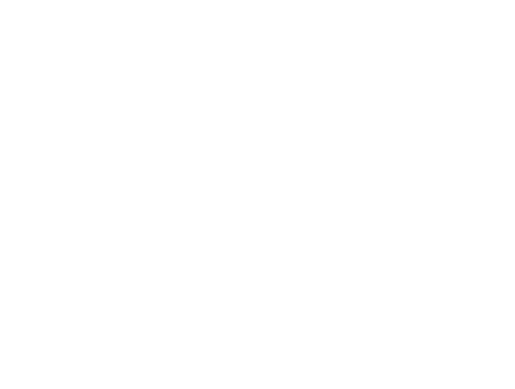

In [147]:
tree.plot_tree(tree_clf)

In [145]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 0.54556418814686
Mean Squared Error: 0.54556418814686
Root Mean Squared Error: 0.7386231705997721


### Train KNN

In [144]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)

In [143]:
knn_classifier.fit(X_train,y_train)

C:\Users\evald\PycharmProjects\IndividualProject\venv\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [140]:
y_pred = knn_classifier.predict(X_test)

In [142]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4146635626735478


### Train KNN Plot

In [125]:
xChoice = recipesLikesDislikes.where(recipesLikesDislikes['average_rating'] > 3)
# xChoice = recipesLikesDislikes[['average_rating']]
yChoice = recipesLikesDislikes[(recipesLikesDislikes['like'] == 1)]

xChoice.shape




(178265, 17)

In [126]:
yChoice.shape

(70518, 17)

In [130]:
tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_split=2, random_state = 42)
tree_clf.fit(xChoice,yChoice)

tree.plot_tree(tree_clf);

ValueError: could not convert string to float: 'aromatic basmati rice  rice cooker'

Make the recipe recommender based on methods strings

In [ ]:
wantedIngredients = ['lettuce','tomato']
wantedIngredients = 'lettuce'
# RAW_recipesdb=food_df.drop(['id','ingredients',''],axis=1)
# testRegex = food_df[food_df.ingredients.str.contains('lettuce|tomato')]
regexTestString = "r'(?=.*"+ wantedIngredients +")'"
testRegex = food_df[food_df.ingredients.str.contains(r'(?=.*lettuce)(?=.*tomato)',regex=True)]

def reccomendRecipes():
    tempMatchRecipes = []
    # for recipe in food_df.ingredients:
    regexString = '((?i)lettuce(?-i))*'
    # pokemon_og_games = food_df.loc[food_df['ingredients'].str.contains("((?i)[lettuce](?-i))", case=False)]
    LocateInTextWantedString = food_df.loc[food_df['ingredients'].str.contains('lettuce', regex=True)]
    # tempMatchRecipes.append(food_df.ingredients.isin(arrayOfIngredients).count)
    tempMatchRecipes.append(LocateInTextWantedString)
    return tempMatchRecipes

testRegex.head(10)

# Get recipes with their average rating that is below what I wante
testEmpty = food_df.where(food_df['average_rating'] == 0).dropna()
testEmpty

In [131]:

# Describing the totalRatingCount column statistically
# pd.set_option('display.float_format', lambda x: '%.3f' %x)
print(food_df['votes'].describe())
food_df['average_rating'].describe()

count    178265.000000
mean          5.245674
std          18.716588
min           1.000000
25%           1.000000
50%           2.000000
75%           5.000000
max        1613.000000
Name: votes, dtype: float64


count    178265.000000
mean          4.405126
std           0.850515
min           0.000000
25%           4.000000
50%           4.666667
75%           5.000000
max           5.000000
Name: average_rating, dtype: float64

In [ ]:
# Regex AND
testRegex = food_df[food_df.ingredients.str.contains(r'(?=.*lettuce)(?=.*tomato)',regex=True)]

In [139]:
#How frequently recipes show up
# newRatingSet=RAW_interactions.groupby(['recipe_id'])['rating'].agg(['mean','count'])
# UniqueSet = food_df.groupby(by=['contributor_id'])['id'].count().sort_values(ascending=False)
UniqueSet = food_df.groupby(['contributor_id'])['id'].agg(['count'])
# UniqueSet.
#(index={0:"IdCount"})
# UniqueSet.head(20)

UniqueSet.reset_index(inplace=True)


#Rename columns
# UniqueSet.rename(columns={'mean':'average_rating','count':'votes'},inplace=True)
# UniqueSet.head(10)
UniqueSet.shape
# UniqueSet['contributor_id']

(22218, 2)

In [138]:
# Scatter on user activity
N = 27926

x = UniqueSet['contributor_id']
y = UniqueSet['count']
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y,s=area, alpha=0.5)
plt.show()

NameError: name 'UniqueSet' is not defined

In [ ]:
#ingredient_ratingCount.hist(column = 'totalRatingCount', bins =50, figsize=(20,5))
# fig, ax = plt.subplots(figsize=(17,8))
# plt.axvline(x=50,ymax=0.95, c='red', label = 'Threshold (50)')
#
# # sns.histplot(ax=ax, data = movie_ratingCount['totalRatingCount'], log_scale=True);
# plt.legend(fontsize=25);

The length of X_ratings: 178265
The length of Y_votes: 178265


ValueError: s must be a scalar, or float array-like with the same size as x and y

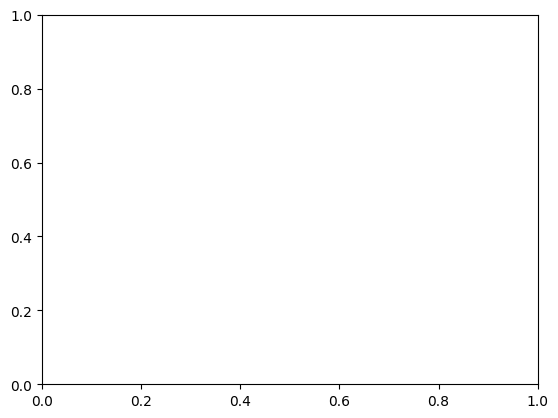

In [132]:
# # Plot section
# xVal = pd.DataFrame(food_df['average_rating'])
# yVal = pd.DataFrame(food_df[['votes']])
#
# # #Normalize
# # scaler_votes = StandardScaler().fit(yVal)
# # yVal = scaler_votes.transform(yVal)
# # scaler_ids = StandardScaler().fit(xVal)
# # xVal = scaler_ids.transform(xVal)
# print('The length of X_ratings: {}'.format(len(xVal)))
# print('The length of Y_votes: {}'.format(len(yVal)))
#
# area = (30 * np.random.rand(231637))**2  # 0 to 15 point radii
# colors = np.random.rand(231637)
# plt.scatter(x=xVal,y=yVal,s=area, c=colors,alpha=0.5,norm='linear' )
# plt.xlabel('average_rating')
# plt.ylabel('votes')
# plt.show()

In [134]:
# xValI = food_df['average_rating'].hist(bins=5)
# yValI = food_df['votes']
# plt.bar(xValI,yValI,width=0.4)
#
# plt.xlabel("average_rating")
# plt.ylabel("No. of votes")
# plt.title("How active is the user responses")
# plt.show()

In [135]:
likeNames = list(food_df['like'].keys())
likeValues = list(food_df['average'].values())

fig ,axs = plt.subplot(1,figsize=(9,3),sharey=True)
axs[1].scatter(likeNames,likeValues)
fig.subtitle("category")
# umap_fit = plt.colormaps()

KeyError: 'average'

In [136]:
newfoodPd = food_df['average_rating']

ratingValue = food_df['average_rating'].values
voteValue = food_df['like'].values
voteValueCorr = newfoodPd[["like","average_rating"]].corr()
voteValueCorr

KeyError: "None of [Index(['like', 'average_rating'], dtype='object')] are in the [index]"

In [137]:
#some kind of training(
from sklearn.model_selection import train_test_split
train, test = train_test_split(food_df, test_size = 0.2)
train_features = train[['name','ingredients','average_rating','ingredient_ids','votes','like']]



In [ ]:
train_features

In [ ]:
#content based filtering
from sklearn.metrics.pairwise import linear_kernel
# TestTrain = food_df
# TestTrain['soup'] = 0
# TestTrain['soup'] = "0"

# train_features = train[['name','ingredients','average_rating','votes','like']]

# def create_soup():
#     return ''.join(TestTrain['ingredients']),''+''.join(TestTrain['steps'])

# TestTrain['soup'] = TestTrain.apply(create_soup,axis=1)
# TF-IDF Vectorizer
# tfidf = TfidfVectorizer(stop_words='english')
# tfidf_matrix = tfidf.fit_transform(TestTrain['soup'])
# tfidf_matrix.shape


In [ ]:
newfoodPd = recipesLikesDislikes['average_rating']
f, ax = plt.subplots(figsize=(20, 10))
corr = recipesLikesDislikes[['like','average_rating']].corr()
sns.heatmap(corr, annot=True,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
plt.show()

In [ ]:
#Box plot

# box_features = tuple(food_df.columns[['votes','contributor_id']].values)
smt = food_df.groupby(by='contributor_id')['recipe_id'].count()
smt.rename(columns={'recipe_id':'interactivity'},inplace=True)
smt.head(20)



# UniqueSet = df_mapping.groupby(by=['replaced'])['id'].count().sort_values(ascending=False)
#recipeMapDataSetFormated.boxplot(column=iris_features, by='replaced', figsize=(15,8), layout=(1,4));

In [ ]:
recipesLikesDislikes['rec_tags'] = recipesLikesDislikes['ingredients']+recipesLikesDislikes['description']+recipesLikesDislikes['steps']

In [ ]:
# recipesLikesDislikes['rec_tags'] = recipesLikesDislikes['rec_tags'].apply(lambda x:[i.replace(" ","") for i in x])

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.feature_extraction.text import CountVectorizer

###### helper functions. Use them when needed #######
def get_title_from_index(index):
	return df[df.index == index]["title"].values[0]

def get_index_from_title(title):
	return df[df.title == title]["index"].values[0]
##################################################

##Step 1: Read CSV File
# df = pd.read_csv(r"./set/output.csv").sample(1000)
df = recipesLikesDislikes.sample(1000)
#print df.columns
##Step 2: Select Features

features = ['name','ingredients','description']
# features = ['name','ingredients','average_rating','votes','like']
##Step 3: Create a column in DF which combines all selected features
for feature in features:
	df[feature] = df[feature].fillna('')
	# df[feature] = df[feature].apply(lambda x: str(x.str.lower())

def combine_features(row):
	try:
		return row['name'] +" "+row['ingredients']+" "+row["average_rating"]+" "+row["votes"]+" "+row["like"]
	except:
		print("Error:", row)

df["combined_features"] = df.apply(combine_features,axis=1)

# df["combined_features"] = df.apply(lambda x: x.astype(str).str.upper())

#print "Combined Features:", df["combined_features"].head()

##Step 4: Create count matrix from this new combined column
cv = CountVectorizer()

count_matrix = cv.fit_transform(df["combined_features"])

##Step 5: Compute the Cosine Similarity based on the count_matrix
cosine_sim = cosine_similarity(count_matrix)
ingredient_user_likes = "cayenne"

## Step 6: Get index of this recipe from its likability
ingredient_index = get_index_from_title(ingredient_user_likes)

similar_recipes =  list(enumerate(cosine_sim[ingredient_index]))

## Step 7: Get a list of similar recipes in descending order of similarity score
sorted_similar_recipes = sorted(similar_recipes,key=lambda x:x[1],reverse=True)

## Step 8: Print titles of first 50 movies
def printRecommendation():
    i=0
    tempArr = []
    for element in sorted_similar_recipes:
            tempArr.append(get_title_from_index(element[0]))
            i=i+1
            if i>5:
                break
    return tempArr


In [ ]:
df

In [ ]:
tempArr = printRecommendation()
tempArr

In [ ]:
# pd.DataFrame(getTitles())

# Output the dataset

In [ ]:
# Made an output for the data set that I could use it outside the workbook as a csv file [Meybe add path where it would save cuz for now its saving on top of project]
def compressionToOutputCsv():
    compresionThingie = dict(method='zip',
                             archive_name='output.csv')
    savedFile = Recipe_prep
    savedFile.to_csv('recipePrep.zip',index=False,compression=compresionThingie)

In [ ]:
# compressionToOutputCsv()